In [24]:
from IPython.display import display, Math, Latex

def disp(ex):
    display(Math(latex(ex)))

def displ(tex):
    display(Math(tex))

In [25]:
# расмотрим модель заряженной частицы имеющей сферическую симметрию распределения заряда с плотностью rho_q(r)
# задача : найти коэффициент самоиндукции такой частицы L
# 1/(J^2)*integral(integral(vector_j*vector_j/R, dV), dV)
# предположение : величина 1/c^2 * L * J^2 / 2 представляет собой кинетическую энергию частицы
# обоснование 1/c^2 * L * J^2 / 2 - энергия магнитного поля, которая равна кинетической энергии (по Николаеву)
# поскольку vector_j = rho_q(r) * vector_v, интеграл
# vector_v*vector_v * integral(rho_q(ra) * integral(rho_q(rq)/R, dVq), dVa)
# по своей форме очень напоминает выражение для кинетической энергии в случае малых скоростей
# m * v^2 / 2 = 1/c^2 * v * v * integral(integral(rho_q(ra)*rho_q(rq)/R, dVq), dVa) / 2
# в котором роль инертной массы играет
# m = 1/c^2 * integral(rho_q(ra) * integral(rho_q(rq)/R, dVq), dVa)
# таким образом отыскав выражение этого интеграла мы можем получить зависимость инертной массы частицы
# от объёмного распределения ее электрического заряда

# для случая больших скоростей в знаменателе нужно использовать радиус Лиенара Вихерта
# R_lw = R - vector_v / c * vector_R

# будем производить вычисления в сферической системе координат, расположенной таким образом,
# что вектор скорости частицы сонаправлен вектору z сферической системы координат

# следуя Тамму, обозначим индексом q координату заряда а индексом a координату точки наблюдения
# vector_R направлен от q к a
# vector_v / c * vector_R = v / c * vector_ort_z * vector_R = v / c * Rz = v / c * (za - zq)

# радиальная координната заряда
# rq = var("rq")
# радиальная координата точки наблюдения
# ra = var("ra")

# assume(rq>0)
# assume(ra>0)

# азимутальная координата заряда
# phi_q = var("theta_q")

# азимутальная координата точки наблюдения
# phi_a = var("theta_a")

# полярная координата заряда
# theta_q = var("theta_q")

# полярная координата точки наблюдения
# theta_a = var("theta_a")

# z - координаты заряда и точки наблюдения

In [26]:
zq = lambda rq, theta_q : rq*cos(theta_q)
za = lambda ra, theta_a : ra*cos(theta_a)

In [27]:
# физический смысл первого интегрирования по dVq есть отыскание векторного потенциала
# создаваемого движущимся распределённым зарядом частицы в ее объёме

# ввиду сферической симметрии векторный потенциал не зависит от угла phi_a
# следовательно при вычислении векторного потенциала мы можем положить phi_a = 0

# введём вспомогательные переменные - цилиндрический радиус
# как координата r точки при переходе в цилиндрическую систему коорденат с тем же направлением оси z


In [28]:
rcq = lambda rq, theta_q : rq*sin(theta_q)
rca = lambda ra, theta_a : ra*sin(theta_a)

In [29]:
# выражение для расстояния между точкой заряда и точкой наблюдения примет вид
# R0 = lambda ra, theta_a, rq, theta_q, phi_q : sqrt(rca^2+rcq^2+(za-zq)^2-2*rca*rcq*cos(phi_q))
R0 = lambda ra, theta_a, rq, theta_q, phi_q : sqrt(rca(ra, theta_a)^2+rcq(rq, theta_q)^2+(za(ra, theta_a)-zq(rq, theta_q))^2-2*rca(ra, theta_a)*rcq(rq, theta_q)*cos(phi_q))


In [30]:
# поскольку по условию задачи распределение плотности заряда частицы сферически симметрично,
# мы можем вынести rho_q(rq) за знак интегрирования по phi_q
# интегрируя 1/R по phi_q от 0 до 2*pi запишем

# rcqa2 = (rcq-rca)^2+(zq-za)^2
# module = - 4*rcq*rca / rcqa2
# Iphi=4*elliptic_kc(module) / sqrt(rcqa2)

rcqa2  = lambda ra, theta_a, rq, theta_q : (rcq(rq,theta_q)-rca(ra,theta_a))^2+(zq(rq, theta_q)-za(ra, theta_a))^2;
module = lambda ra, theta_a, rq, theta_q : - 4*rcq(rq,theta_q)*rca(ra,theta_a) / rcqa2(ra, theta_a, rq, theta_q);
Iphi   = lambda ra, theta_a, rq, theta_q : 4*elliptic_kc(module(ra, theta_a, rq, theta_q)) / sqrt(rcqa2(ra, theta_a, rq, theta_q));


In [31]:
# http://maths.cnam.fr/Membres/wilk/MathMax/help/Maxima/maxima_17.html
# Function: elliptic_kc (m)
# The complete elliptic integral of the first kind, defined as
# integrate(1/sqrt(1 - m*sin(x)^2), x, 0, %pi/2)

# https://www.math.aau.at/user/cheuberg/sage/doc/6.5.beta2-4-g2e57cf9/en/reference/functions/sage/functions/special.html
# class sage.functions.special.EllipticKC
# Bases: sage.functions.special.MaximaFunction
# This returns the value of the “complete elliptic integral of the first kind,”


In [32]:
# print "Iphi =", Iphi(ra, theta_a, rq, theta_q)
# Iphi = 4*elliptic_kc(-4*ra*rq*sin(theta_a)*sin(theta_q)/((ra*cos(theta_a) - rq*cos(theta_q))^2 + (ra*sin(theta_a) - rq*sin(theta_q))^2))/sqrt((ra*cos(theta_a) - rq*cos(theta_q))^2 + (ra*sin(theta_a) - rq*sin(theta_q))^2)


In [33]:
def my_numerical_integral1(f, a, b):
    print ("f = ", f)
    print ("f(x) = ", f(x))
    print ("a = ", a)
    print ("b = ", b)
    integral = numerical_integral(f, a, b)
    print ("integral = ", integral)
    result = integral[0]
    print ("result = ", result)
    return result

def my_numerical_integral(f, a, b):
    #print ("f = ", f)
    #print ("f(x) = ", f(x))
    #print ("a = ", a)
    #print ("b = ", b)
    from scipy import integrate
    #import ctypes
    try:
        integral = integrate.quad(f, a, b)
        #print "integral = ", integral
        result = integral[0]
        #print "result = ", result
        return result
    except Exception as ex:
        print ("ex = ", str(ex))
        print ("f = ", f)
        #print ("f(x) = ", f(x))
        print ("a = ", a)
        print ("b = ", b)
        raise ex
        integral = numerical_integral(f, a, b)
        print ("integral = ", integral)
        result = integral[0]
        print ("result = ", result)
        return result

In [34]:
print (exp(-1/x).nintegral(x, 1, 2))

print (my_numerical_integral(lambda x : exp(-1/x), 1, 2))

print ( lambda phi_q : 1 / R0 (ra, theta_a, rq, theta_q, phi_q) )


(0.504792217873184, 5.604319429344074e-15, 21, 0)
0.504792217873184
<function <lambda> at 0x7f55d4366560>


In [35]:
def calc1_m():
    rq, ra, theta_a, theta_q, phi_q = var("rq, ra, theta_a, theta_q, phi_q")
    I1 = lambda ra, theta_a, rq, theta_q : ( 1 / R0 (ra, theta_a, rq, theta_q, phi_q) )   .nintegral(phi_q, 0, 2*pi)

    I2 = lambda ra, theta_a, rq          : ( I1(ra, theta_a, rq, theta_q) * sin(theta_q) ).nintegral(theta_q, 0, pi)
    #I2 = lambda ra, theta_a, rq          : ( Iphi(ra, theta_a, rq, theta_q) * sin(theta_q) ).nintegral(theta_q, 0, pi)

    # распределение заряда ядра приближённо выражается распределением Ферми
    # http://nuclphys.sinp.msu.ru/ndb/ndb102.htm

    rho_q = lambda rho0, Rq, aq, r : rho0 / (1 + exp( (r - Rq) / aq) )

    I3 = lambda rho0, Rq, aq, ra, theta_a : ( rho_q(rho0, Rq, aq, rq) * rq^2 * I2(ra, theta_a, rq) ).nintegral(rq, 0, infinity)

    I4 = lambda rho0, Rq, aq, ra, theta_a : 2 * pi * I3(rho0, Rq, aq, ra, theta_a)

    I5 = lambda rho0, Rq, aq, ra : ( I4(rho0, Rq, aq, ra, theta_a) * sin(theta_a)).nintegral(theta_a, 0, pi)

    I6 = lambda rho0, Rq, aq : ( rho_q(rho0, Rq, aq, ra) * ra^2 * I5(rho0, Rq, aq, ra)).nintegral(ra, 0, infinity)

    I6(1, 1, 1)

    #m = (mju_0 / (4 * pi)) * I6(rho0, Rq, aq)

In [36]:
# calc1_m()
# ECL says: Error executing code in Maxima: quad_qags: Cannot numerically evaluate errexp1 at 3.141592653589793

In [37]:
def calc2_m():
    I1 = lambda ra, theta_a, rq, theta_q : my_numerical_integral( lambda phi_q : 1 / R0 (ra, theta_a, rq, theta_q, phi_q), 0, 2*pi)

    # I2 = lambda ra, theta_a, rq          : my_numerical_integral( lambda theta_q : I1(ra, theta_a, rq, theta_q) * sin(theta_q), 0, pi)
    I2 = lambda ra, theta_a, rq          : my_numerical_integral( lambda theta_q : Iphi(ra, theta_a, rq, theta_q) * sin(theta_q), 0, pi)

    # распределение заряда ядра приближённо выражается распределением Ферми
    # http://nuclphys.sinp.msu.ru/ndb/ndb102.htm

    rho_q = lambda rho0, Rq, aq, r : rho0 / (1 + exp( (r - Rq) / aq) )

    I3 = lambda rho0, Rq, aq, ra, theta_a : my_numerical_integral( lambda rq : rho_q(rho0, Rq, aq, rq) * rq^2 * I2(ra, theta_a, rq),  0, infinity)

    I4 = lambda rho0, Rq, aq, ra, theta_a : 2 * pi * I3(rho0, Rq, aq, ra, theta_a)

    I5 = lambda rho0, Rq, aq, ra : my_numerical_integral( lambda theta_a : I4(rho0, Rq, aq, ra, theta_a) * sin(theta_a), 0, pi)

    I6 = lambda rho0, Rq, aq : my_numerical_integral( lambda ra : rho_q(rho0, Rq, aq, ra) * ra^2 * I5(rho0, Rq, aq, ra), 0, infinity)

    # I6(rho0, Rq, aq)

    I7 = I6(1, 1, 1)
    print ("I6(1, 1, 1) = ", I7)

    # using Iphi
    # integral =  (820.1392952900268, 0.0004965284196251068)
    # result =  820.13929529
    # I6(1, 1, 1) =  820.13929529
    # m = (mju_0 / (4 * pi)) * I6(rho0, Rq, aq)

    # using I1
    # float division by zero
    # ...
    # float division by zero
    # integral =  (17.077164899361996, 0.0721483434946714)
    # result =  17.0771648994
    # ex =  float division by zero
    # f =  <function <lambda> at 0x7fcf9034a7d0>
    # f(x) =  1/sqrt(-10.595854716776243*cos(x) + 10.595854716776243)
    # a =  0
    # b =  2*pi
    # float division by zero
    # ....
    # float division by zero
    # integral =  (17.07716489912273, 0.07214834349503378)
    # result =  17.0771648991
    # math range error
    # math range error
    # math range error
    # Killed

In [38]:
# calc2_m()

In [39]:
def calc3_scalar_potential():
    # распределение заряда ядра приближённо выражается распределением Ферми
    # http://nuclphys.sinp.msu.ru/ndb/ndb102.htm
    import numpy as np

    rho_q = lambda rho0, Rq, aq, r : rho0 / (1 + np.exp( (r - Rq) / aq) )

    Ir = lambda rho0, Rq, aq, theta_a, ra, phi_q, theta_q : my_numerical_integral( lambda rq : rho_q(rho0, Rq, aq, rq) * rq^2 * sin(theta_q) / R0 (ra, theta_a, rq, theta_q, phi_q),  0, infinity)

    I2 = lambda rho0, Rq, aq, theta_a, ra, phi_q : my_numerical_integral( lambda theta_q : Ir(rho0, Rq, aq, theta_a, ra, phi_q, theta_q), 0, pi)

    I3 = lambda rho0, Rq, aq, theta_a, ra : my_numerical_integral( lambda phi_q : I2(rho0, Rq, aq, theta_a, ra, phi_q), 0, 2*pi)

    # scalar_potential = I3(1, 1, 1, 0.5, pi/4)
    # print "I3(1, 1, 1, 0.5, pi/4) = ", scalar_potential
    # I3(1, 1, 1, 0.5, pi/4) =  21.8634904207

    I4 = lambda rho0, Rq, aq, theta_a, ra : 2 * pi * I3(rho0, Rq, aq, theta_a, ra)

    I5 = lambda rho0, Rq, aq, theta_a : my_numerical_integral( lambda ra : rho_q(rho0, Rq, aq, ra) * I4(rho0, Rq, aq, theta_a, ra) * sin(theta_a) * ra^2, 0, infinity)

    I6 = lambda rho0, Rq, aq : my_numerical_integral( lambda theta_a : I5 (rho0, Rq, aq, theta_a), 0, pi)

    # I6(rho0, Rq, aq)

    I7 = I6(1, 1, 1)
    print ("I6(1, 1, 1) = ", I7)
    # sage/src/bin/sage-ipython:220: RuntimeWarning: overflow encountered in exp
    # I6(1, 1, 1) =  820.139143519


In [40]:
#calc3_scalar_potential()

In [41]:
def calc_proton_mass():
    # http://www.actaphys.uj.edu.pl/fulltext?series=Reg&vol=30&page=119
    # the rms charge radius of the proton being
    # rp_rms = 0.8
    # r0 = 2/3 * rp_rms
    # the charge distribution of the proton
    # g(r) = exp(-r^2/r__0^2)/(r__0^3*sqrt(pi)^3)

    rho_q = lambda r0, r : exp(-r^2/r0^2)/(r0^3*sqrt(pi)^3)

    Ir = lambda r0, theta_a, ra, phi_q, theta_q : my_numerical_integral( lambda rq : rho_q(r0, rq) * rq^2 * sin(theta_q) / R0 (ra, theta_a, rq, theta_q, phi_q),  0, infinity)

    I2 = lambda r0, theta_a, ra, phi_q : my_numerical_integral( lambda theta_q : Ir(r0, theta_a, ra, phi_q, theta_q), 0, pi)

    I3 = lambda r0, theta_a, ra : my_numerical_integral( lambda phi_q : I2(r0, theta_a, ra, phi_q), 0, 2*pi)

    I4 = lambda r0, theta_a, ra : 2 * pi * I3(r0, theta_a, ra)

    I5 = lambda r0, theta_a : my_numerical_integral( lambda ra : rho_q(r0, ra) * I4(r0, theta_a, ra) * sin(theta_a) * ra^2, 0, infinity)

    I6 = lambda r0 : my_numerical_integral( lambda theta_a : I5 (r0, theta_a), 0, pi)

    I7 = I6(2/3 * 0.8)
    print ("I6(2/3 * 0.8) = ", I7)
    # Killed


In [42]:
def calc_neutron_mass():
    # http://www.actaphys.uj.edu.pl/fulltext?series=Reg&vol=30&page=119

    # the rms value of g__n
    # r2 := -0.113

    # The third parameter r1 is a scaling parameter, which is necessary to define
    # a dimensionless quantity (r/r1) in the Gaussian exponent. The results of
    # QCD-calculations of the charge density distribution inside the neutron [2]
    # are best reproduced by choosing:
    # r1 = 0.71*sqrt(2/5) # fm

    # the charge density distribution within the neutron
    # gn(r) = (-2/3)*(r2 / (r1^2 * (r1*sqrt(pi))^3)) * (r/r1)^2 * (1 - (2/5)*r^2/r1^2) * exp(-r^2/r1^2)

    rho_q = lambda r1, r2, r : (-2/3)*(r2 / (r1^2 * (r1*sqrt(pi))^3)) * (r/r1)^2 * (1 - (2/5)*r^2/r1^2) * exp(-r^2/r1^2)

    Ir = lambda r1, r2, theta_a, ra, phi_q, theta_q : my_numerical_integral( lambda rq : rho_q(r1, r2, rq) * rq^2 * sin(theta_q) / R0 (ra, theta_a, rq, theta_q, phi_q),  0, infinity)

    I2 = lambda r1, r2, theta_a, ra, phi_q : my_numerical_integral( lambda theta_q : Ir(r1, r2, theta_a, ra, phi_q, theta_q), 0, pi)

    I3 = lambda r1, r2, theta_a, ra : my_numerical_integral( lambda phi_q : I2(r1, r2, theta_a, ra, phi_q), 0, 2*pi)

    I4 = lambda r1, r2, theta_a, ra : 2 * pi * I3(r1, r2, theta_a, ra)

    I5 = lambda r1, r2, theta_a : my_numerical_integral( lambda ra : rho_q(r1, r2, ra) * I4(r1, r2, theta_a, ra) * sin(theta_a) * ra^2, 0, infinity)

    I6 = lambda r1, r2 : my_numerical_integral( lambda theta_a : I5 (r1, r2, theta_a), 0, pi)

    I7 = I6(0.71*sqrt(2/5), -0.113)

    print ("I6(0.71*sqrt(2/5), -0.113) = ", I7)
    # Killed


In [19]:
nquad_default_opts = \
           { 'epsabs' : 1.49e-08,
             'epsrel' : 1.49e-08,
             'limit'  : 50 }

nquad_opts = { 'epsabs' : 1.49e-03,
               'epsrel' : 1.49e-03,
               'limit'  : 20 }

In [20]:
from IPython.display import display, Math, Latex

def disp(eq):
    display(Math(latex(eq)))

def displ(tex):
    display(Math(tex))

In [45]:
def calc_proton_mass2():
    # http://www.actaphys.uj.edu.pl/fulltext?series=Reg&vol=30&page=119
    # the rms charge radius of the proton being
    # rp_rms = 0.8
    # r0 = 2/3 * rp_rms
    # the charge distribution of the proton
    # g(r) = exp(-r^2/r__0^2)/(r__0^3*sqrt(pi)^3)

    file = open('calc_proton_mass2.txt', 'a')
    file.write('http://www.actaphys.uj.edu.pl/fulltext?series=Reg&vol=30&page=119\n')
    file.write('the rms charge radius of the proton being\n')
    file.write('rp_rms = 0.8\n')
    file.write('r0 = 2/3 * rp_rms\n')
    file.write('the charge distribution of the proton\n')
    file.write('g(r) = exp(-r^2/r__0^2)/(r__0^3*sqrt(pi)^3)\n')
    file.close()

    rho_q = lambda r0, r : exp(-r^2/r0^2)/(r0^3*sqrt(pi)^3)

    Ir = lambda r0, theta_a, ra, phi_q, theta_q, rq : rho_q(r0, rq) * rq^2 * sin(theta_q) / R0 (ra, theta_a, rq, theta_q, phi_q)    # (rq,  0, infinity)

    I2 = lambda r0, theta_a, ra, phi_q, theta_q, rq : Ir(r0, theta_a, ra, phi_q, theta_q, rq)                                       # (theta_q, 0, pi)

    I3 = lambda r0, theta_a, ra, phi_q, theta_q, rq : I2(r0, theta_a, ra, phi_q, theta_q, rq)                                       # (phi_q, 0, 2*pi)

    I4 = lambda r0, theta_a, ra, phi_q, theta_q, rq : 2 * pi * I3(r0, theta_a, ra, phi_q, theta_q, rq)

    I5 = lambda r0, theta_a, ra, phi_q, theta_q, rq : rho_q(r0, ra) * I4(r0, theta_a, ra, phi_q, theta_q, rq) * sin(theta_a) * ra^2 # (ra, 0, infinity)

    I6 = lambda r0, theta_a, ra, phi_q, theta_q, rq : I5 (r0, theta_a, ra, phi_q, theta_q, rq)                                      # (theta_a, 0, pi)

    I7 = lambda theta_a, ra, phi_q, theta_q, rq : I6(2/3 * 0.8, theta_a, ra, phi_q, theta_q, rq)

    from scipy import integrate
    #                              theta_a, ra,            phi_q,      theta_q,  rq
    answer = integrate.nquad(I7, [ [0, pi], [0, infinity], [0, 2*pi],  [0, pi],  [0, infinity]], opts=nquad_opts)

    print ("I6(2/3 * 0.8) = ", answer)
    # I6(2/3 * 0.8) =  (1.4960348943817992, 0.0026474827067254846)

    # Elementary charge, coulombs
    e = 1.60217662e-19
    mju0 = 4*pi*10^(-7) # H/m
    k = mju0 / (4 * pi) * e^2 / 10^-15
    m = k * answer[0]
    print ("m = ", m)
    # 3.84027657565375e-30

    me = 9.1093837015e-31
    print ("m / me = ", m / me)
    # 4.21573698231790

    file = open('calc_proton_mass2.txt', 'a')
    file.write('\n')
    file.write('I6(2/3 * 0.8) = ')
    file.write(str(answer))
    file.write('\n')
    file.write('m = ')
    file.write(str(m))
    file.write('\n\n')
    file.close()

In [46]:
#calc_proton_mass2()

In [47]:
def calc_neutron_mass2():
    # http://www.actaphys.uj.edu.pl/fulltext?series=Reg&vol=30&page=119

    # the rms value of g__n
    # r2 := -0.113

    # The third parameter r1 is a scaling parameter, which is necessary to define
    # a dimensionless quantity (r/r1) in the Gaussian exponent. The results of
    # QCD-calculations of the charge density distribution inside the neutron [2]
    # are best reproduced by choosing:
    # r1 = 0.71*sqrt(2/5) # fm

    # the charge density distribution within the neutron
    # gn(r) = (-2/3)*(r2 / (r1^2 * (r1*sqrt(pi))^3)) * (r/r1)^2 * (1 - (2/5)*r^2/r1^2) * exp(-r^2/r1^2)

    file = open('calc_neutron_mass2.txt', 'a')
    file.write('http://www.actaphys.uj.edu.pl/fulltext?series=Reg&vol=30&page=119\n')
    file.write('the rms value of g__n\n')
    file.write('r2 := -0.113\n')
    file.write('\n')
    file.write('The third parameter r1 is a scaling parameter, which is necessary to define\n')
    file.write('a dimensionless quantity (r/r1) in the Gaussian exponent. The results of\n')
    file.write('QCD-calculations of the charge density distribution inside the neutron [2]\n')
    file.write('are best reproduced by choosing:\n')
    file.write('r1 = 0.71*sqrt(2/5) # fm\n')
    file.write('\n')
    file.write('the charge density distribution within the neutron\n')
    file.write('gn(r) = (-2/3)*(r2 / (r1^2 * (r1*sqrt(pi))^3)) * (r/r1)^2 * (1 - (2/5)*r^2/r1^2) * exp(-r^2/r1^2)\n')
    file.close()

    rho_q = lambda r1, r2, r : (-2/3)*(r2 / (r1^2 * (r1*sqrt(pi))^3)) * (r/r1)^2 * (1 - (2/5)*r^2/r1^2) * exp(-r^2/r1^2)

    Ir = lambda r1, r2, theta_a, ra, phi_q, theta_q, rq : rho_q(r1, r2, rq) * rq^2 * sin(theta_q) / R0 (ra, theta_a, rq, theta_q, phi_q)              # (rq, 0, infinity)

    I2 = lambda r1, r2, theta_a, ra, phi_q, theta_q, rq : Ir(r1, r2, theta_a, ra, phi_q, theta_q, rq)                                                     # (theta_q, 0, pi)

    I3 = lambda r1, r2, theta_a, ra, phi_q, theta_q, rq : I2(r1, r2, theta_a, ra, phi_q, theta_q, rq)                                                              # (phi_q, 0, 2*pi)

    I4 = lambda r1, r2, theta_a, ra, phi_q, theta_q, rq : 2 * pi * I3(r1, r2, theta_a, ra, phi_q, theta_q, rq)

    I5 = lambda r1, r2, theta_a, ra, phi_q, theta_q, rq : rho_q(r1, r2, ra) * I4(r1, r2, theta_a, ra, phi_q, theta_q, rq) * sin(theta_a) * ra^2       # (ra, 0, infinity)

    I6 = lambda r1, r2, theta_a, ra, phi_q, theta_q, rq : I5 (r1, r2, theta_a, ra, phi_q, theta_q, rq )                                               # (theta_a, 0, pi)

    I7 = lambda theta_a, ra, phi_q, theta_q, rq  : I6(0.71*sqrt(2/5), -0.113, theta_a, ra, phi_q, theta_q, rq)

    from scipy import integrate
    #                              theta_a, ra,            phi_q,      theta_q,  rq
    answer = integrate.nquad(I7, [ [0, pi], [0, infinity], [0, 2*pi],  [0, pi],  [0, infinity]], opts=nquad_opts)

    print ("I6(0.71*sqrt(2/5), -0.113) = ", answer)

    file = open('calc_neutron_mass2.txt', 'a')
    file.write('\n')
    file.write('I6(0.71*sqrt(2/5), -0.113) = ')
    file.write(str(answer))
    file.write('\n\n')
    file.close()
    # Killed


In [15]:
def calc_sphere_mass():

    file = open('calc_sphere_mass.txt', 'a')
    file.close()

    rho_q = lambda r0, q : 3*q / (4*pi*r0^3)

    # (rq, 0, r0)
    Ir = lambda r0, q, theta_a, ra, phi_q, theta_q, rq : rho_q(r0, q) * rq^2 * sin(theta_q) / R0 (ra, theta_a, rq, theta_q, phi_q)

    # (theta_q, 0, pi)
    I2 = lambda r0, q, theta_a, ra, phi_q, theta_q, rq : Ir(r0, q, theta_a, ra, phi_q, theta_q, rq)

    # (phi_q, 0, 2*pi)
    I3 = lambda r0, q, theta_a, ra, phi_q, theta_q, rq : I2(r0, q, theta_a, ra, phi_q, theta_q, rq)

    I4 = lambda r0, q, theta_a, ra, phi_q, theta_q, rq : 2 * pi * I3(r0, q, theta_a, ra, phi_q, theta_q, rq)

    # (ra, 0, r0)
    I5 = lambda r0, q, theta_a, ra, phi_q, theta_q, rq : rho_q(r0, q) * I4(r0, q, theta_a, ra, phi_q, theta_q, rq) * sin(theta_a) * ra^2

    # (theta_a, 0, pi)
    I6 = lambda r0, q, theta_a, ra, phi_q, theta_q, rq : I5 (r0, q, theta_a, ra, phi_q, theta_q, rq)

    if True: 
        forget()

        theta_q, phi_q = var('theta_q, phi_q')
        assume(theta_q, 'real')
        assume(phi_q, 'real')

        theta_a, phi_a = var('theta_a, phi_a')
        assume(theta_a, 'real')
        assume(phi_a, 'real')

        r_q, r_a, r0, q = var("r_q, r_a, r_0, q")
        disp(I6(r0, q, theta_a, r_a, phi_q, theta_q, r_q))

        return

    Iq1 = lambda r0, theta_a, ra, phi_q, theta_q, rq : I6(r0, 1, theta_a, ra, phi_q, theta_q, rq)

    from scipy import integrate
    Ir0 = lambda r0 : integrate.nquad(lambda theta_a, ra, phi_q, theta_q, rq : \
                                      Iq1(r0, theta_a, ra, phi_q, theta_q, rq), \
                                      [ [0, pi], [0, r0], [0, 2*pi],  [0, pi],  [0, r0]], opts=nquad_opts)
    #                                   theta_a,  ra,      phi_q,     theta_q,   rq

    # answer = Ir0(0.1)
    # print "Ir0(0.1) = ", answer
    # Killed

    answer = Ir0(1.0)
    print ("Ir0(1) = ", answer)
    # Ir0(1) =  (1.1999998963704677, 0.005411660477958158)

    file = open('calc_sphere_mass.txt', 'a')
    file.write('\n')
    file.write('Ir0(1) = ')
    file.write(str(answer))
    file.close()


In [48]:
calc_sphere_mass()

<IPython.core.display.Math object>

In [1]:
%%cython
cdef extern from "numerical_integrators/cuba/calc_gradient_coulomb_sphere_mass.c":
    # интегрирование по координатам точек наблюдения
    double Ia (double r0, double q, double theta_a, double ra, double phi_q, double theta_q, double rq)

def gradient_coulomb_sphere_mass_integrand(r0, q, theta_a, ra, phi_q, theta_q, rq):
    cdef double _r0      = r0
    cdef double _q       = q
    cdef double _theta_a = theta_a
    cdef double _ra      = ra
    cdef double _phi_q   = phi_q
    cdef double _theta_q = theta_q
    cdef double _rq      = rq
    return Ia(_r0, _q, _theta_a, _ra, _phi_q, _theta_q, _rq)

In [2]:
%%cython
cdef extern from "numerical_integrators/cuba/calc_gradient_sphere_mass.c":
    # интегрирование по координатам точек наблюдения
    double Ia (double r0, double q, double theta_a, double ra, double phi_q, double theta_q, double rq)

def gradient_sphere_mass_integrand(r0, q, theta_a, ra, phi_q, theta_q, rq):
    cdef double _r0      = r0
    cdef double _q       = q
    cdef double _theta_a = theta_a
    cdef double _ra      = ra
    cdef double _phi_q   = phi_q
    cdef double _theta_q = theta_q
    cdef double _rq      = rq
    return Ia(_r0, _q, _theta_a, _ra, _phi_q, _theta_q, _rq)

In [3]:
%%cython
cdef extern from "numerical_integrators/cuba/calc_gradient_sphere_mass_a.c":
    # интегрирование по координатам точек наблюдения
    double Ia (double r0, double q, double theta_a, double ra, double phi_q, double theta_q, double rq, double c, double a)

def gradient_sphere_mass_a_integrand(r0, q, c, a, theta_a, ra, phi_q, theta_q, rq):
    cdef double _r0      = r0
    cdef double _q       = q
    cdef double _theta_a = theta_a
    cdef double _ra      = ra
    cdef double _phi_q   = phi_q
    cdef double _theta_q = theta_q
    cdef double _rq      = rq
    cdef double _c       = c
    cdef double _a       = a

    return Ia(_r0, _q, _theta_a, _ra, _phi_q, _theta_q, _rq, _c, _a)

In [4]:
%%cython
cdef extern from "numerical_integrators/cuba/calc_gradient_sphere_mass_fermi.c":
    # интегрирование по координатам точек наблюдения
    double Ia (double r0, double q, double theta_a, double ra, double phi_q, double theta_q, double rq, double c, double a)

def gradient_sphere_mass_fermi_integrand(r0, q, c, a, theta_a, ra, phi_q, theta_q, rq):
    cdef double _r0      = r0
    cdef double _q       = q
    cdef double _theta_a = theta_a
    cdef double _ra      = ra
    cdef double _phi_q   = phi_q
    cdef double _theta_q = theta_q
    cdef double _rq      = rq
    cdef double _c       = c
    cdef double _a       = a

    return Ia(_r0, _q, _theta_a, _ra, _phi_q, _theta_q, _rq, _c, _a)

In [5]:
%%cython
cdef extern from "numerical_integrators/cuba/calc_inductive_sphere_mass.c":
    # интегрирование по координатам точек наблюдения
    double Ia (double r0, double q, double theta_a, double ra, double phi_q, double theta_q, double rq)

def inductive_sphere_mass_integrand(r0, q, theta_a, ra, phi_q, theta_q, rq):
    cdef double _r0      = r0
    cdef double _q       = q
    cdef double _theta_a = theta_a
    cdef double _ra      = ra
    cdef double _phi_q   = phi_q
    cdef double _theta_q = theta_q
    cdef double _rq      = rq
    return Ia(_r0, _q, _theta_a, _ra, _phi_q, _theta_q, _rq)

In [6]:
%%cython
# Приближение малых скоростей с учётом запаздывания
cdef extern from "numerical_integrators/cuba/calc_inductive_sphere_mass_a.c":
    # интегрирование по координатам точек наблюдения
    double Ia (double r0, double q, double theta_a, double ra, double phi_q, double theta_q, double rq, double c, double a)

def inductive_sphere_mass_a_integrand(r0, q, c, a, theta_a, ra, phi_q, theta_q, rq):
    cdef double _r0      = r0
    cdef double _q       = q
    cdef double _theta_a = theta_a
    cdef double _ra      = ra
    cdef double _phi_q   = phi_q
    cdef double _theta_q = theta_q
    cdef double _rq      = rq
    cdef double _c       = c
    cdef double _a       = a
    return Ia(_r0, _q, _theta_a, _ra, _phi_q, _theta_q, _rq, _c, _a)

In [7]:
%%cython
# Приближение малых скоростей с учётом запаздывания
cdef extern from "numerical_integrators/cuba/calc_inductive_sphere_mass_fermi.c":
    # интегрирование по координатам точек наблюдения
    double Ia (double r0, double q, double theta_a, double ra, double phi_q, double theta_q, double rq, double c, double a)

def inductive_sphere_mass_fermi_integrand(r0, q, c, a, theta_a, ra, phi_q, theta_q, rq):
    cdef double _r0      = r0
    cdef double _q       = q
    cdef double _theta_a = theta_a
    cdef double _ra      = ra
    cdef double _phi_q   = phi_q
    cdef double _theta_q = theta_q
    cdef double _rq      = rq
    cdef double _c       = c
    cdef double _a       = a
    return Ia(_r0, _q, _theta_a, _ra, _phi_q, _theta_q, _rq, _c, _a)

In [8]:
from scipy import integrate as scipy_integrate
import numpy as np
gradient_coulomb_sphere_mass = lambda r0, q : scipy_integrate.nquad(lambda theta_a, ra, phi_q, theta_q, rq : \
                                  gradient_coulomb_sphere_mass_integrand(r0, q, theta_a, ra, phi_q, theta_q, rq), \
                                  [ [0, np.pi], [0, r0], [0, 2*np.pi],  [0, np.pi],  [0, r0]])#, opts=nquad_opts)
#                                    theta_a,    ra,       phi_q,        theta_q,      rq

In [9]:
from scipy import integrate as scipy_integrate
import numpy as np
gradient_sphere_mass = lambda r0, q : scipy_integrate.nquad(lambda theta_a, ra, phi_q, theta_q, rq : \
                                  gradient_sphere_mass_integrand(r0, q, theta_a, ra, phi_q, theta_q, rq), \
                                  [ [0, np.pi], [0, r0], [0, 2*np.pi],  [0, np.pi],  [0, r0]])#, opts=nquad_opts)
#                                    theta_a,    ra,       phi_q,        theta_q,      rq

In [10]:
from scipy import integrate as scipy_integrate
import numpy as np
gradient_sphere_mass_on_a = lambda r0, q, c, a : scipy_integrate.nquad(lambda theta_a, ra, phi_q, theta_q, rq : \
                                  gradient_sphere_mass_a_integrand(r0, q, c, a, theta_a, ra, phi_q, theta_q, rq), \
                                  [ [0, np.pi], [0, r0], [0, 2*np.pi],  [0, np.pi],  [0, r0]])#, opts=nquad_opts)
#                                    theta_a,    ra,       phi_q,        theta_q,      rq

In [11]:
from scipy import integrate as scipy_integrate
import numpy as np
gradient_sphere_mass_fermi = lambda r0, q, c, a : scipy_integrate.nquad(lambda theta_a, ra, phi_q, theta_q, rq : \
                                  gradient_sphere_mass_fermi_integrand(r0, q, c, a, theta_a, ra, phi_q, theta_q, rq), \
                                  [ [0, np.pi], [0, r0], [0, 2*np.pi],  [0, np.pi],  [0, r0]])#, opts=nquad_opts)
#                                    theta_a,    ra,       phi_q,        theta_q,      rq

In [12]:
from scipy import integrate as scipy_integrate
import numpy as np
inductive_sphere_mass = lambda r0, q : scipy_integrate.nquad(lambda theta_a, ra, phi_q, theta_q, rq : \
                                  inductive_sphere_mass_integrand(r0, q, theta_a, ra, phi_q, theta_q, rq), \
                                  [ [0, np.pi], [0, r0], [0, 2*np.pi],  [0, np.pi],  [0, r0]])#, opts=nquad_opts)
#                                    theta_a,    ra,       phi_q,        theta_q,      rq

In [13]:
from scipy import integrate as scipy_integrate
inductive_sphere_mass_on_a = lambda r0, q, c, a : scipy_integrate.nquad(lambda theta_a, ra, phi_q, theta_q, rq : \
                                  inductive_sphere_mass_a_integrand(r0, q, c, a, theta_a, ra, phi_q, theta_q, rq), \
                                  [ [0, np.pi], [0, r0], [0, 2*np.pi],  [0, np.pi],  [0, r0]], opts=nquad_opts)
#                                    theta_a,    ra,       phi_q,        theta_q,      rq

In [14]:
from scipy import integrate as scipy_integrate
inductive_sphere_mass_fermi = lambda r0, q, c, a : scipy_integrate.nquad(lambda theta_a, ra, phi_q, theta_q, rq : \
                                  inductive_sphere_mass_fermi_integrand(r0, q, c, a, theta_a, ra, phi_q, theta_q, rq), \
                                  [ [0, np.pi], [0, r0], [0, 2*np.pi],  [0, np.pi],  [0, r0]], opts=nquad_opts)
#                                    theta_a,    ra,       phi_q,        theta_q,      rq

In [60]:
gradient_sphere_mass(1,1)

/usr3/articles/sagemath_docker_build/sage/local/lib/python3.10/site-packages/scipy/integrate/quadpack.py:879: IntegrationWarning: The algorithm does not converge.  Roundoff error is detected
  in the extrapolation table.  It is assumed that the requested tolerance
  cannot be achieved, and that the returned result (if full_output = 1) is 
  the best which can be obtained.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,


(0.3999999998324903, 4.54804878027501e-07)

In [65]:
_gradient_sphere_mass = 0.4
_inductive_sphere_mass = 1.2
_electrostatic_energy = 1.2
(0.4+1.2)/1.2

1.33333333333333

In [63]:
(4+12)/12

4/3

$^3$ Обычно говорят, что электромагнитная масса равномерно заряженного сферического слоя с общим зарадом $e$ и радиусом $r$ равна $\frac{2}{3} \frac{e^2}{r c^2}$; если же заметить, что электростатическая энергия $u = \frac{1}{2} \frac{e^2}{r}$, то для массы находим как раз $\left(\frac{4}{3}\right) \frac{u}{c^2}$.

$^3$ Обычно говорят, что электромагнитная масса равномерно заряженной сферы с общим зарадом $e$ и радиусом $r$ равна $\frac{8}{5} \frac{e^2}{r c^2}$; если же заметить, что электростатическая энергия $u = \frac{6}{5} \frac{e^2}{r}$, то для массы находим как раз $\left(\frac{4}{3}\right) \frac{u}{c^2}$.

In [56]:
inductive_sphere_mass(1,1)
# (1.1999998963704677, 0.005411660477942615)
# (1.1999999997980622, 8.128824378894617e-08)

(1.1999999997980622, 8.128824378894617e-08)

In [16]:
gradient_sphere_mass(1,1)

/usr3/articles/sagemath_docker_build/sage/local/lib/python3.10/site-packages/scipy/integrate/quadpack.py:879: IntegrationWarning: The algorithm does not converge.  Roundoff error is detected
  in the extrapolation table.  It is assumed that the requested tolerance
  cannot be achieved, and that the returned result (if full_output = 1) is 
  the best which can be obtained.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,


(0.3999999998324903, 4.54804878027501e-07)

In [64]:
inductive_sphere_mass(1,1)
# (1.1999998963704677, 0.005411660477942615)

(1.1999998963704677, 0.005411660477942615)

In [22]:
# m_grad_coulomb_fermi = gradient_sphere_mass(r0 = 1, q = 1)[0]
m_grad_coulomb_fermi = 0.4
print("m_grad_coulomb_fermi = ", m_grad_coulomb_fermi)

m_grad_coulomb_fermi =  0.400000000000000


In [23]:
def mass_hysteresis(a):
    print("a =", a)
    m_ind = inductive_sphere_mass_on_a(r0 = 1, q = 1, c = 1, a = a)
    print("m_ind = ",  m_ind)
    m_grad = gradient_sphere_mass_on_a(r0 = 1, q = 1, c = 1, a = a)
    print("m_grad = ", m_grad)
    m = (m_ind[0] + m_grad[0] - m_grad_coulomb_fermi) / 6 * 5
    print("a =", a, "m =", m)
    return m

In [24]:
def mass_hysteresis_fermi(a):
    # print("a =", a)
    m_ind_fermi = inductive_sphere_mass_fermi(r0 = 1, q = 1, c = 1, a = a)
    print("m_ind_fermi = ",  m_ind_fermi)
    m_grad_fermi = gradient_sphere_mass_fermi(r0 = 1, q = 1, c = 1, a = a)
    print("m_grad_fermi = ", m_grad_fermi)
    m = (m_ind_fermi[0] + m_grad_fermi[0] - m_grad_coulomb_fermi) / 6 * 5
    print("a =", a, "m =", m)
    return m

In [25]:
mass_hysteresis_array = []
mass_hysteresis_lw_array = []
mass_hysteresis_fermi_array = []
for a in [0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.11, 0.12, 0.13, 0.14, 0.15, 0.2, 0.25]:
    m = mass_hysteresis(a)
    m_f = mass_hysteresis_fermi(a)
    mass_hysteresis_array += [(a, m, m_f)]
    mass_hysteresis_lw_array += [(a, m)]
    mass_hysteresis_fermi_array += [(a, m_f)]

a = 0.0500000000000000
m_ind =  (1.1995701225903943, 0.005411670190957452)
m_grad =  (0.3998709652299156, 3.255951022947786e-05)
a = 0.0500000000000000 m = 0.999534239850258
m_ind_fermi =  (1.1991408320910102, 0.005411670850874906)
m_grad_fermi =  (0.39909926222040615, 3.2559115862621964e-05)
a = 0.0500000000000000 m = 0.998533411926180
a = 0.0600000000000000
m_ind =  (1.1993802561474989, 0.005411663560736635)
m_grad =  (0.3998138928211004, 1.317235598346435e-05)
a = 0.0600000000000000 m = 0.999328457473833
m_ind_fermi =  (1.198761617732484, 0.005411664511406844)
m_grad_fermi =  (0.3987024644518463, 1.3172284822050604e-05)
a = 0.0600000000000000 m = 0.997886735153609
a = 0.0700000000000000
m_ind =  (1.1991552545400774, 0.005411665456307002)
m_grad =  (0.39974620539208905, 8.393910613574253e-06)
a = 0.0700000000000000 m = 0.999084549943472
m_ind_fermi =  (1.1983124741199478, 0.005411666750468225)
m_grad_fermi =  (0.3982331423376702, 8.39380534920578e-06)
a = 0.0700000000000000 m = 0.997

In [27]:
mass_hysteresis_array

[(0.0500000000000000, 0.999534239850258, 0.998533411926180),
 (0.0600000000000000, 0.999328457473833, 0.997886735153609),
 (0.0700000000000000, 0.999084549943472, 0.997121347048015),
 (0.0800000000000000, 0.998802151038892, 0.996236663037223),
 (0.0900000000000000, 0.998480826574296, 0.995231992053507),
 (0.100000000000000, 0.998120075645079, 0.994106531814520),
 (0.110000000000000, 0.997719316871170, 0.992859359089797),
 (0.120000000000000, 0.997277887814471, 0.991489419282912),
 (0.130000000000000, 0.996795034054818, 0.989995511663719),
 (0.140000000000000, 0.996269900282946, 0.988376277522028),
 (0.150000000000000, 0.995701516634966, 0.986630172385874),
 (0.200000000000000, 0.992166577377660, 0.975926576296128),
 (0.250000000000000, 0.987293131847707, 0.961645777306959)]

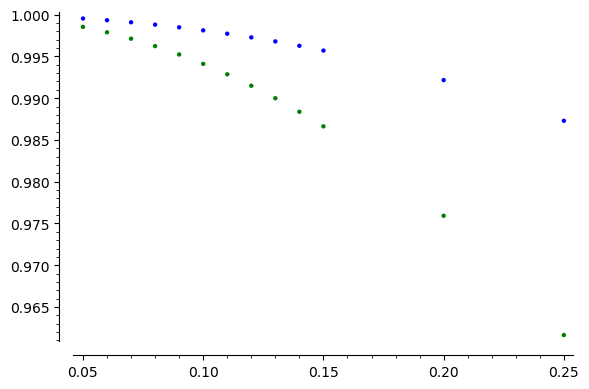

In [30]:
list_plot(mass_hysteresis_lw_array) + list_plot(mass_hysteresis_fermi_array, color="green")

In [76]:
va = [ 
    0.0001,
     0.001,
     0.01,
     0.1,
     0.2,
     0.3,
     0.4,
     0.5,
     0.6,
     0.7,
     0.8,
     0.9,
     1.0,
     2.0,
     5.0,
     10.0,
     100.0,
     1000.0,
     1250.0,
     1500.0,
     1750.0,
     2000.0,
     2100.0
    ]

In [ ]:
for a in va:
    print(a, inductive_sphere_mass_on_a(1,1,1,a))

0.000100000000000000 (inf, inf)
0.00100000000000000 (inf, inf)
0.0100000000000000 (inf, inf)
0.100000000000000 (1.1982659892561969, 0.005411660537869789)
0.200000000000000 (1.1927949914577507, 0.005411664969900087)


/usr3/articles/sagemath_docker_build/sage/local/lib/python3.10/site-packages/scipy/integrate/quadpack.py:879: IntegrationWarning: The maximum number of subdivisions (20) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,


0.300000000000000 (nan, 0.00665065085663652)


In [29]:
for a in [-0.2,-0.1, 0.1, 0.2]:
    print(a, gradient_sphere_mass_fermi(1,1,1,a))

/usr3/articles/sagemath_docker_build/sage/local/lib/python3.10/site-packages/scipy/integrate/quadpack.py:879: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,
/usr3/articles/sagemath_docker_build/sage/local/lib/python3.10/site-packages/scipy/integrate/quadpack.py:879: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,
/usr3/articles/

-0.200000000000000 (-0.3853806229848659, 5.061357680252008e-07)
-0.100000000000000 (-0.3963878789970252, 4.23679882968413e-06)
0.100000000000000 (0.3963878789970253, 4.4437535411935865e-06)
0.200000000000000 (0.3853806229848659, 4.548060077089189e-07)


In [ ]:
for a in [-0.2,-0.1, 0.1, 0.2]:
    print(a, gradient_sphere_mass_on_a(1,1,1,a))

/usr3/articles/sagemath_docker_build/sage/local/lib/python3.10/site-packages/scipy/integrate/quadpack.py:879: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,
/usr3/articles/sagemath_docker_build/sage/local/lib/python3.10/site-packages/scipy/integrate/quadpack.py:879: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,
/usr3/articles/

-0.200000000000000 (-0.397804901395441, 5.061631976670979e-07)
-0.100000000000000 (-0.3994781015178971, 4.236751755173836e-06)


In [11]:
for a in [-0.2,-0.1, 0.1, 0.2]:
    print(a, inductive_sphere_mass_on_a(1,1,1,a))

-0.200000000000000 (-1.1927949914577507, 0.005411664970004448)
-0.100000000000000 (-1.1982659892561969, 0.005411660536732477)
0.100000000000000 (1.1982659892561969, 0.005411660537869789)
0.200000000000000 (1.1927949914577507, 0.005411664969900087)


In [28]:
for a in [-0.2,-0.1, 0.1, 0.2]:
    print(a, inductive_sphere_mass_fermi(1,1,1,a))

-0.200000000000000 (-1.1857312685704882, 0.005411675540702543)
-0.100000000000000 (-1.1965399591803991, 0.0054116631793981185)
0.100000000000000 (1.1965399591803991, 0.005411663180552306)
0.200000000000000 (1.185731268570488, 0.005411675540608396)


In [ ]:
for a in [-0.4, -0.3, -0.2, -0.1, 0.1, 0.2, 0.3, 0.4]:
    print(a, inductive_sphere_mass_fermi(1,1,1,a))

In [ ]:
# 0.000100000000000000 (inf, inf)
# 0.00100000000000000 (inf, inf)
# 0.0100000000000000 (inf, inf)
# 0.100000000000000 (1.1982659892561969, 0.005411660537869789)
# 0.200000000000000 (1.1927949914577507, 0.005411664969900087)


Поскольку расстояние между координатами заряда и точки наблюдения ${{R}_{0}}=\left|\overrightarrow{r_{q}} - \overrightarrow{r_{a}}\right|$ находится в знаменателе, то в сферической системе координат можно применить разложение по сферическим гармоникам следующего вида  \cite{flugge} если $\left( {{r}_{q}}<{{r}_{a}} \right)$ то

$\frac{1}{\left| \overrightarrow{{{r}_{q}}}-\overrightarrow{{{r}_{a}}} \right|}=\frac{1}{{{r}_{a}}}\sum\limits_{l=0}^{\infty }{{{\left( \frac{{{r}_{q}}}{{{r}_{a}}} \right)}^{l}}{{P}_{l}} \cos \left( \gamma  \right)}$

и если $\left( {{r}_{a}}<{{r}_{q}} \right)$ то

$\frac{1}{\left| \overrightarrow{{{r}_{q}}}-\overrightarrow{{{r}_{a}}} \right|}=\frac{1}{{{r}_{q}}}\sum\limits_{l=0}^{\infty }{{{\left( \frac{{{r}_{a}}}{{{r}_{q}}} \right)}^{l}}{{P}_{l}} \cos \left( \gamma  \right)}$

В данной формуле ${{P}_{l}} \cos \left( \gamma  \right)$ это полиномы Лежандра аргумент которых $\gamma$ есть угол между векторами ${{r}_{q}}$  и ${{r}_{a}}$. Применяя формулу, известную как теорему сложения

${{P}_{l}}\cos \left( \gamma  \right)=\frac{4\pi }{2l+1}\sum\limits_{m=-l}^{l}{Y_{l,m}^{*}\left( {{\theta }_{a}},{{\varphi }_{a}} \right)}\ {{Y}_{l,m}}\left( {{\theta }_{q}},{{\varphi }_{q}} \right)$

получаем способ аналитического вычисления интеграла индукционной компоненты инертной электромагнитной массы.


In [1]:
# З.Флюгге Задачи по квантовой механике, том 2, стр. 299 формула (24)
def legendre_summ(l, theta_q, phi_q, theta_a, phi_a):
    from sage.functions.special import spherical_harmonic
    m = var("m")
    f = lambda l, m, theta_q, phi_q, theta_a, phi_a \
        : spherical_harmonic(l, m, theta_q, phi_q) \
        * conjugate(spherical_harmonic(l, m, theta_a, phi_a))
    return 4 * pi / (2*l + 1) * sum(f(l, m, theta_q, phi_q, theta_a, phi_a), m, -l, l)

In [13]:
# З.Флюгге Задачи по квантовой механике, том 2, стр. 299 формула (24)
def legendre_sym(l):
    from sage.functions.special import spherical_harmonic
    P_l = function("P_l")(l,x)
    gamma = var("gamma")
    return P_l(l=l, x=cos(gamma))

In [26]:
def legendre_summ_of_inductive_mass_of_proton(l):
    # http://www.actaphys.uj.edu.pl/fulltext?series=Reg&vol=30&page=119
    # the rms charge radius of the proton being
    # rp_rms = 0.8
    # r0 = 2/3 * rp_rms
    # the charge distribution of the proton
    # g(r) = exp(-r^2/r__0^2)/(r__0^3*sqrt(pi)^3)

    forget()

    theta_q, phi_q = var('theta_q, phi_q')
    assume(theta_q, 'real')
    assume(phi_q, 'real')

    theta_a, phi_a = var('theta_a, phi_a')
    assume(theta_a, 'real')
    assume(phi_a, 'real')

    r_q, r_a = var("r_q, r_a")
    R = var("R")

    rho_q = lambda r0, r : exp(-r^2/r0^2)/(r0^3*sqrt(pi)^3)

    print (latex(rho_q(var("r0"), r_q)))

    assume(r_a>0)
    assume(r_a<R)
    #assume(R>0)

    R = infinity
    rp_rms = 0.8
    r0 = 2/3 * rp_rms

    # З.Флюгге Задачи по квантовой механике, том 2, стр. 300 формула (29)

    # if r_q < r_a
    potential_1 = ((1/r_a)*((r_q/r_a)^l)*rho_q(r0, r_q)*sin(theta_q)*(r_q^2) \
                   * legendre_summ(l, theta_q, phi_q, theta_a, phi_a)) \
                       .integrate(theta_q, 0, pi).integrate(phi_q, 0, 2*pi).integrate(r_q, 0, r_a)

    # if r_a < r_q
    potential_2 = ((1/r_q)*((r_a/r_q)^l)*rho_q(r0, r_q)*sin(theta_q)*(r_q^2) \
                   * legendre_summ(l, theta_q, phi_q, theta_a, phi_a))
                       .integrate(theta_q, 0, pi).integrate(phi_q, 0, 2*pi).integrate(r_q, r_a, R)

    potential = potential_1 + potential_2

    return (potential * rho_q(r0, r_a) * sin(theta_a) * r_a^2) \
        .integrate(r_a, 0, R).integrate(theta_a, 0, pi).integrate(phi_a, 0, 2*pi)

In [27]:
def legendre_summ_of_inductive_mass_of_neutron(l):
    # http://www.actaphys.uj.edu.pl/fulltext?series=Reg&vol=30&page=119

    # the rms value of g__n
    r2 = -0.113

    # The third parameter r1 is a scaling parameter, which is necessary to define
    # a dimensionless quantity (r/r1) in the Gaussian exponent. The results of
    # QCD-calculations of the charge density distribution inside the neutron [2]
    # are best reproduced by choosing:
    r1 = 0.71*sqrt(2/5) # fm

    # the charge density distribution within the neutron
    # gn(r) = (-2/3)*(r2 / (r1^2 * (r1*sqrt(pi))^3)) * (r/r1)^2 * (1 - (2/5)*r^2/r1^2) * exp(-r^2/r1^2)
    
    forget()

    theta_q, phi_q = var('theta_q, phi_q')
    assume(theta_q, 'real')
    assume(phi_q, 'real')

    theta_a, phi_a = var('theta_a, phi_a')
    assume(theta_a, 'real')
    assume(phi_a, 'real')

    r_q, r_a = var("r_q, r_a")
    R = var("R")

    rho_q = lambda r1, r2, r : (-2/3)*(r2 / (r1^2 * (r1*sqrt(pi))^3)) * (r/r1)^2 * (1 - (2/5)*r^2/r1^2) * exp(-r^2/r1^2)

    print (latex(rho_q(var("r1"), var("r2"), r_q)))

    assume(r_a>0)
    assume(r_a<R)
    #assume(R>0)

    R = infinity

    # if r_q < r_a
    potential_1 = ((1/r_a)*((r_q/r_a)^l)*rho_q(r1, r2, r_q)*sin(theta_q)*(r_q^2) \
                   *legendre_summ(l, theta_q, phi_q, theta_a, phi_a)) \
        .integrate(theta_q, 0, pi).integrate(phi_q, 0, 2*pi).integrate(r_q, 0, r_a)

    # if r_a < r_q
    potential_2 = ((1/r_q)*((r_a/r_q)^l)*rho_q(r1, r2, r_q)*sin(theta_q)*(r_q^2) \
                   *legendre_summ(l, theta_q, phi_q, theta_a, phi_a)) \
        .integrate(theta_q, 0, pi).integrate(phi_q, 0, 2*pi).integrate(r_q, r_a, R)

    potential = potential_1 + potential_2

    return (potential * rho_q(r1, r2, r_a) * sin(theta_a) * r_a^2) \
        .integrate(r_a, 0, R).integrate(theta_a, 0, pi).integrate(phi_a, 0, 2*pi)


\section{Рассчёт Мисюченко через индуктивность}

В работе \cite{misyuchenko} приводится способ вычисления инертной электромагнитной массы электрона исходя из коэффициента самоиндукции сферы и производной тока сферы по времени. Результат вычислений электромагнитной массы электрона авторы приводят следующий $m =\frac{{{\mu }_{0}}}{8\pi }\frac{e^2}{{{r}_{0}}}$ (СИ) то есть в два раза меньший, чем полученный в данной работе.

Анализ показывает, что приведенная авторами формула коэффициента самоиндукции сферы $L =\frac{{{\mu }_{0}}{r}_{0}}{2\pi }$ (СИ) в 2 раза занижена. Автором данной работы было произведено вычисление коэффициента самоиндукции сферической поверхности с равномерно распределённым поверхностным зарядом. Получена формула $L =\frac{{{\mu }_{0}}{r}_{0}}{\pi }$ (СИ) .

Далее авторы  работы \cite{misyuchenko} пишут, "Отметим тот важный факт, что выведенная из закона самоиндукции масса полностью совпадает с Эйнштейновской массой $m=\frac{U}{c^2}$ , если под полной энергией электрона U понимать собственную энергию его электрического поля."

Однако с учётом исправленного значения коэффициента самоиндукции сферы данное утверждение становится неверным.


In [5]:
def legendre_summ_of_inductivity_of_sphere(l):
    forget()
    theta_q, phi_q = var('theta_q, phi_q')
    assume(theta_q, 'real')
    assume(phi_q, 'real')

    theta_a, phi_a = var('theta_a, phi_a')
    assume(theta_a, 'real')
    assume(phi_a, 'real')

    r_q, r_a = var("r_q, r_a")
    R = var("R")
    rho = var("rho")

    assume(r_a>0)
    assume(r_a<R)
    #assume(R>0)

    v = var("v")

    # if r_q < r_a
    A_1 = ((1/r_a)*((r_q/r_a)^var("l"))*rho*v*sin(theta_q)*(r_q^2) \
        * legendre_summ(var("l"), theta_q, phi_q, theta_a, phi_a)) \
            .integrate(theta_q, 0, pi, hold=True) \
            .integrate(phi_q, 0, 2*pi, hold=True) \
            .integrate(r_q, 0, r_a, hold=True)
    
    displ("A_1=" + latex(A_1))
    
    A1 = ((1/r_a)*((r_q/r_a)^l)*rho*v*sin(theta_q)*(r_q^2) \
        * legendre_summ(l, theta_q, phi_q, theta_a, phi_a)) \
            .integrate(theta_q, 0, pi).integrate(phi_q, 0, 2*pi).integrate(r_q, 0, r_a)
    
    disp(A1)

    # if r_a < r_q
    A_2 = ((1/r_q)*((r_a/r_q)^var("l"))*rho*v*sin(theta_q)*(r_q^2) \
        * legendre_summ(var("l"), theta_q, phi_q, theta_a, phi_a)) \
            .integrate(theta_q, 0, pi, hold=True) \
            .integrate(phi_q, 0, 2*pi, hold=True) \
            .integrate(r_q, r_a, R, hold=True)
    
    displ("A_2=" + latex(A_2))

    # if r_a < r_q
    A2 = ((1/r_q)*((r_a/r_q)^l)*rho*v*sin(theta_q)*(r_q^2) \
        * legendre_summ(l, theta_q, phi_q, theta_a, phi_a)) \
            .integrate(theta_q, 0, pi).integrate(phi_q, 0, 2*pi).integrate(r_q, r_a, R)
    
    disp(A2)

    A = A1 + A2

    V = 4/3 * pi * R^3
    q = rho * V
    # J = (rho*v).integrate(dS) -> (mean) -> (rho*v).integrate(dV) / (2*R) = q*v / (2 * R)
    J = q * v / (2 * R)

    return var("mu_0") / (4*pi) * (A * rho * v * sin(theta_a) * r_a^2) \
        .integrate(r_a, 0, R).integrate(theta_a, 0, pi).integrate(phi_a, 0, 2*pi) / (J^2)

In [38]:
disp(legendre_summ_of_inductivity_of_sphere(0))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [6]:
def legendre_summ_of_gradient_mass_of_sphere_1(l):
    forget()
    theta_q, phi_q = var('theta_q, phi_q')
    assume(theta_q, 'real')
    assume(phi_q, 'real')

    theta_a, phi_a = var('theta_a, phi_a')
    assume(theta_a, 'real')
    assume(phi_a, 'real')

    r_q, r_a = var("r_q, r_a")
    R = var("R")
    rho = var("rho")

    assume(r_a>0)
    assume(r_a<R)
    #assume(R>0)
    
    za_minus_zq = r_a*cos(theta_a) - r_q*cos(theta_q)
    # https://math.stackexchange.com/questions/2700052/expressing-angle-between-two-vectors-in-3d-in-terms-of-spherical-polar-coordinat
    # vec_r_a = r_a * sin(theta_a)*cos(phi_a) * i + r_a * sin(theta_a)*sin(phi_a) * j + r_a * cos(theta_a)
    # vec_r_q = r_q * sin(theta_q)*cos(phi_q) * i + r_q * sin(theta_q)*sin(phi_q) * j + r_a * cos(theta_q)
    # vec_r_a_dot_vec_r_q = r_a * r_q *
    #                     ( sin(theta_a)*cos(phi_a)*sin(theta_q)*cos(phi_q)
    #                     + sin(theta_a)*sin(phi_a)*sin(theta_q)*sin(phi_q)
    #                     + cos(theta_a) * cos(theta_q))
    #                     )
    cos_gamma = sin(theta_a)*cos(phi_a)*sin(theta_q)*cos(phi_q) \
              + sin(theta_a)*sin(phi_a)*sin(theta_q)*sin(phi_q) \
              + cos(theta_a) * cos(theta_q)

    # if r_q < r_a
    # one_per_R_1 = ((1/r_a)*((r_q/r_a)^l)*legendre_summ(l, theta_q, phi_q, theta_a, phi_a))
    one_per_R3_1 = ((l/(r_a^3*(cos_gamma - (r_q/r_a))))*((r_q/r_a)^(l-1))*legendre_summ(l, theta_q, phi_q, theta_a, phi_a))
    integrand_1 = (za_minus_zq * one_per_R3_1*sin(theta_q)*(r_q^2))
    integral_1  = integrand_1.integrate(theta_q, 0, pi).integrate(phi_q, 0, 2*pi).integrate(r_q, 0, r_a)

    # if r_a < r_q
    # one_per_R_2 = ((1/r_q)*((r_a/r_q)^l)*legendre_summ(l, theta_q, phi_q, theta_a, phi_a))
    one_per_R3_2 = ((l/(r_q^3*(cos_gamma - (r_a/r_q))))*((r_a/r_q)^(l-1))*legendre_summ(l, theta_q, phi_q, theta_a, phi_a))
    integrand_2 = (za_minus_zq * one_per_R3_2*sin(theta_q)*(r_q^2))
    integral_2  = integrand_2.integrate(theta_q, 0, pi).integrate(phi_q, 0, 2*pi).integrate(r_q, r_a, R)

    field = rho * (integral_1 + integral_2)

    return ( field * rho * sin(theta_a) * r_a^2).integrate(r_a, 0, R).integrate(theta_a, 0, pi).integrate(phi_a, 0, 2*pi)


In [39]:
legendre_summ_of_gradient_mass_of_sphere_1(0)

0

In [7]:
def legendre_summ_of_gradient_mass_of_sphere(l):
    forget()
    theta_q, phi_q = var('theta_q, phi_q')
    assume(theta_q, 'real')
    assume(phi_q, 'real')

    theta_a, phi_a = var('theta_a, phi_a')
    assume(theta_a, 'real')
    assume(phi_a, 'real')

    r_q, r_a = var("r_q, r_a")
    assume(r_a, 'real')
    assume(r_q, 'real')
    R = var("R")
    rho = var("rho")
    assume(R, 'real')
    assume(rho, 'real')

    assume(r_a>0)
    assume(r_a<R)
    assume(r_q>0)
    assume(r_q<R)
    assume(R>0)
    
    
    #ValueError: Computation failed since Maxima requested additional constraints; 
    #using the 'assume' command before evaluation *may* help (example of legal syntax is '
    #assume((4*sin(phi_a)^2*sin(phi_q)^2
    #    +8*cos(phi_a)*sin(phi_a)*cos(phi_q)
    #      *sin(phi_q)+4*cos(phi_a)^2*cos(phi_q)^2)
    #      *r_a^2*sin(theta_a)^2
    #    +4*r_a^2*cos(theta_a)^2-4*r_q^2 > 0)
    
    assume((4*sin(phi_a)^2*sin(phi_q)^2 +8*cos(phi_a)*sin(phi_a)*cos(phi_q)*sin(phi_q)+4*cos(phi_a)^2*cos(phi_q)^2) * r_a^2*sin(theta_a)^2 + 4*r_a^2*cos(theta_a)^2-4*r_q^2 > 0)
    
    za_minus_zq = r_a*cos(theta_a) - r_q*cos(theta_q)
    # https://math.stackexchange.com/questions/2700052/expressing-angle-between-two-vectors-in-3d-in-terms-of-spherical-polar-coordinat
    # vec_r_a = r_a * sin(theta_a)*cos(phi_a) * i + r_a * sin(theta_a)*sin(phi_a) * j + r_a * cos(theta_a)
    # vec_r_q = r_q * sin(theta_q)*cos(phi_q) * i + r_q * sin(theta_q)*sin(phi_q) * j + r_a * cos(theta_q)
    # vec_r_a_dot_vec_r_q = r_a * r_q *
    #                     ( sin(theta_a)*cos(phi_a)*sin(theta_q)*cos(phi_q)
    #                     + sin(theta_a)*sin(phi_a)*sin(theta_q)*sin(phi_q)
    #                     + cos(theta_a) * cos(theta_q))
    #                     )
    cos_gamma = sin(theta_a)*cos(phi_a)*sin(theta_q)*cos(phi_q) \
              + sin(theta_a)*sin(phi_a)*sin(theta_q)*sin(phi_q) \
              + cos(theta_a) * cos(theta_q)

    # if r_q < r_a
    #one_per_R_1 = ((1/r_a)*((r_q/r_a)^l)*legendre_summ(l, theta_q, phi_q, theta_a, phi_a))
    one_per_R3_1 = ((l/(r_a^3*(cos_gamma - (r_q/r_a))))*((r_q/r_a)^(l-1))*legendre_summ(l, theta_q, phi_q, theta_a, phi_a))
    integrand_1 = (za_minus_zq^2 * one_per_R3_1*sin(theta_q)*(r_q^2))
    print("integrand_1", integrand_1)
    integrand_1 = integrand_1.subs(phi_a == 0)
    print("integrand_1", integrand_1)
    
    assume(r_q < r_a)
    #integral_1  = integrand_1.integrate(theta_q, 0, pi).integrate(phi_q, 0, 2*pi).integrate(r_q, 0, r_a)
    integral_1  = integrand_1.integrate(theta_q, 0, pi)
    integral_1  = integral_1.integrate(phi_q, 0, 2*pi)
    integral_1  = integral_1.integrate(r_q, 0, r_a)
    
    #Is cos(phi_q)^2*r_a^2*sin(theta_a)^2 + r_a^2*cos(theta_a)^2-r_q^2
    #positive or negative?
    
    # if r_a < r_q
    #one_per_R_2 = ((1/r_q)*((r_a/r_q)^l)*legendre_summ(l, theta_q, phi_q, theta_a, phi_a))
    one_per_R3_2 = ((l/(r_q^3*(cos_gamma - (r_a/r_q))))*((r_a/r_q)^(l-1))*legendre_summ(l, theta_q, phi_q, theta_a, phi_a))
    integrand_2 = (za_minus_zq^2 * one_per_R3_2*sin(theta_q)*(r_q^2))
    print("integrand_2", integrand_2)
    integrand_2 = integrand_2.expand()
    print("integrand_2", integrand_2)
    #integral_2  = integrand_2.integrate(theta_q, 0, pi).integrate(phi_q, 0, 2*pi).integrate(r_q, r_a, R)
    integral_2  = integrand_2.integrate(phi_q, 0, 2*pi).integrate(r_q, r_a, R).integrate(theta_q, 0, pi)

    field = rho * (integral_1 + integral_2)

    return ( field * rho * sin(theta_a) * r_a^2).integrate(r_a, 0, R).integrate(theta_a, 0, pi).integrate(phi_a, 0, 2*pi)


In [8]:
def legendre_summ_of_inductive_mass_of_sphere(l):
    forget()
    theta_q, phi_q = var('theta_q, phi_q')
    assume(theta_q, 'real')
    assume(phi_q, 'real')

    theta_a, phi_a = var('theta_a, phi_a')
    assume(theta_a, 'real')
    assume(phi_a, 'real')

    r_q, r_a = var("r_q, r_a")
    R = var("R")
    rho = var("rho")

    assume(r_a>0)
    assume(r_a<R)
    #assume(R>0)

    # if r_q < r_a
    potential_1 = ((1/r_a)*((r_q/r_a)^l)*rho*sin(theta_q)*(r_q^2)*legendre_summ(l, theta_q, phi_q, theta_a, phi_a)).integrate(theta_q, 0, pi).integrate(phi_q, 0, 2*pi).integrate(r_q, 0, r_a)
    # if r_a < r_q
    potential_2 = ((1/r_q)*((r_a/r_q)^l)*rho*sin(theta_q)*(r_q^2)*legendre_summ(l, theta_q, phi_q, theta_a, phi_a)).integrate(theta_q, 0, pi).integrate(phi_q, 0, 2*pi).integrate(r_q, r_a, R)

    potential = potential_1 + potential_2

    return (potential * rho * sin(theta_a) * r_a^2).integrate(r_a, 0, R).integrate(theta_a, 0, pi).integrate(phi_a, 0, 2*pi)

In [9]:
def legendre_summ_of_inductivity_of_spherical_shell(l):
    forget()
    theta_q, phi_q = var('theta_q, phi_q')
    assume(theta_q, 'real')
    assume(phi_q, 'real')

    theta_a, phi_a = var('theta_a, phi_a')
    assume(theta_a, 'real')
    assume(phi_a, 'real')

    R = var("R")
    assume(R>0)
    
    # rho = var("q")/(4*pi*R^2)*dirac_delta(r_a-R)
    sigma = var("q")/(4*pi*R^2)
    
    v = var("v")


    A = (1/R)*(sigma*v*sin(theta_q)*(R^2)*legendre_summ(l, theta_q, phi_q, theta_a, phi_a)).integrate(theta_q, 0, pi).integrate(phi_q, 0, 2*pi)

    # S = 4*pi*R^2
    # q = rho*V

    # J = (sigma*v).integrate(dl) -> (mean) -> (sigma*v).integrate(dS) / (2*R)
    J = q * v / (2 * R)
    J = (sigma*v*sin(theta_q)*(R^2)).integrate(theta_q, 0, pi).integrate(phi_q, 0, 2*pi) / (2 * R)
    print ("J =", J)

    return var("mju0")/(4*pi) * (A * sigma * v * sin(theta_a) * R^2).integrate(theta_a, 0, pi).integrate(phi_a, 0, 2*pi) / (J^2)

In [10]:
legendre_summ_of_inductivity_of_spherical_shell(0)

J = 1/2*q*v/R


R*mju0/pi

In [13]:
def legendre_summ_of_inductive_mass_of_spherical_shell(l):
    forget()
    theta_q, phi_q = var('theta_q, phi_q')
    assume(theta_q, 'real')
    assume(phi_q, 'real')

    theta_a, phi_a = var('theta_a, phi_a')
    assume(theta_a, 'real')
    assume(phi_a, 'real')

    R = var("R")
    # rho = var("q")/(4*pi*R^2)*dirac_delta(r_a-R)
    sigma = var("q")/(4*pi*R^2)

    assume(R>0)

    potential = ((1/R)*sigma*sin(theta_q)*(R^2)*legendre_summ(l, theta_q, phi_q, theta_a, phi_a)).integrate(theta_q, 0, pi).integrate(phi_q, 0, 2*pi)

    return (potential * sigma * sin(theta_a) * R^2).integrate(theta_a, 0, pi).integrate(phi_a, 0, 2*pi)

In [34]:
def make_spherical_plot3d(f):
    # Color plots on surface of sphere
    var('x,y')
    cm = colormaps.spring
    cf = lambda x,y: (sin(x) + cos(y)) % 1
    return spherical_plot3d(f, (phi_a,0,2*pi), (theta_a,0,pi), color=(cf,cm))

In [35]:
def calc_inductivity_of_spherical_shell():
    from sage.functions.special import spherical_harmonic
    forget()
    theta_q, phi_q = var('theta_q, phi_q')
    assume(theta_q, 'real')
    assume(phi_q, 'real')

    theta_a, phi_a = var('theta_a, phi_a')
    assume(theta_a, 'real')
    assume(phi_a, 'real')

    l,m = var('l,m')
    f = spherical_harmonic(l, m, theta_q, phi_q) * conjugate(spherical_harmonic(l, m, theta_a, phi_a))
    print (sum(f, m, -l, l))
    print (legendre_summ(l, theta_q, phi_q, theta_a, phi_a))

    for l in range(0, 4):
        print ("l =", str(l), " legendre_summ = ", legendre_summ(l, theta_q, phi_q, theta_a, phi_a).simplify())
        print ("l =", str(l), " legendre_summ.integral = ", (sin(theta_q)*legendre_summ(l, theta_q, phi_q, theta_a, phi_a)).integrate(theta_q, 0, pi))
        print ("l =", str(l), " legendre_summ.integral = ", (sin(theta_a)*(sin(theta_q)*legendre_summ(l, theta_q, phi_q, theta_a, phi_a)).integrate(theta_q, 0, pi)).integrate(theta_a, 0, pi))
        print ("l =", str(l), " legendre_summ.integral = ", (sin(theta_a)*(sin(theta_q)*legendre_summ(l, theta_q, phi_q, theta_a, phi_a)).integrate(theta_q, 0, pi)).integrate(theta_a, 0, pi).integrate(phi_q, 0, 2*pi))
        print ("l =", str(l), " legendre_summ.integral = ", (sin(theta_a)*(sin(theta_q)*legendre_summ(l, theta_q, phi_q, theta_a, phi_a)).integrate(theta_q, 0, pi)).integrate(theta_a, 0, pi).integrate(phi_q, 0, 2*pi).integrate(phi_a, 0, 2*pi))
        print ("legendre_summ_of_inductivity_of_sphere(", l, ") =", legendre_summ_of_inductivity_of_sphere(l))
        L = legendre_summ_of_inductivity_of_spherical_shell(l)
        print ("legendre_summ_of_inductivity_of_spherical_shell(", l, ") =", L)

    # legendre_summ_of_inductivity_of_sphere( 0 ) = 6/5*R*mju0/pi
    # legendre_summ_of_inductivity_of_spherical_shell( 0 ) = R*mju0/pi

In [36]:
calc_inductivity_of_spherical_shell()

sum(conjugate(spherical_harmonic(l, m, theta_a, phi_a))*spherical_harmonic(l, m, theta_q, phi_q), m, -l, l)
4*pi*sum(conjugate(spherical_harmonic(l, m, theta_a, phi_a))*spherical_harmonic(l, m, theta_q, phi_q), m, -l, l)/(2*l + 1)
l = 0  legendre_summ =  1
l = 0  legendre_summ.integral =  2
l = 0  legendre_summ.integral =  4
l = 0  legendre_summ.integral =  8*pi
l = 0  legendre_summ.integral =  16*pi^2
legendre_summ_of_inductivity_of_sphere( 0 ) = 6/5*R*mju0/pi
J = 1/2*q*v/R
legendre_summ_of_inductivity_of_spherical_shell( 0 ) = R*mju0/pi
l = 1  legendre_summ =  1/2*(2*cos(theta_a)*cos(theta_q)*e^(I*phi_a + I*phi_q) + (e^(2*I*phi_a) + e^(2*I*phi_q))*sin(theta_a)*sin(theta_q))*e^(-I*phi_a - I*phi_q)
l = 1  legendre_summ.integral =  1/4*(pi*e^(2*I*phi_a) + pi*e^(2*I*phi_q))*e^(-I*phi_a - I*phi_q)*sin(theta_a)
l = 1  legendre_summ.integral =  1/8*pi*(pi*e^(2*I*phi_a) + pi*e^(2*I*phi_q))*e^(-I*phi_a - I*phi_q)
l = 1  legendre_summ.integral =  0
l = 1  legendre_summ.integral =  0
legendre_s

In [37]:
def calc_inductive_mass_of_sphere():
    forget()
    q = var("q")
    print ("\ncalc_inductive_mass_of_sphere")
    # https://en.wikipedia.org/wiki/Electromagnetic_mass
    m = legendre_summ_of_inductive_mass_of_sphere(0)
    print ("m =", m)
    # m = 32/15*pi^2*R^5*rho^2

    V = 4/3*pi*R^3
    m = m.subs(rho = q/V)
    print ("m =", m)
    # m = 6/5*q^2/R

    m = var("mju0")/(4*pi) * m
    print ("m =", m)
    # m = 3/10*mju0*q^2/(pi*R)

    # Classical electron radius
    # https://en.wikipedia.org/wiki/
    # Классический радиус электрона равен радиусу полой сферы,
    # на которой равномерно распределён заряд,
    # если этот заряд равен заряду электрона,
    # а потенциальная энергия электростатического поля {\displaystyle U_{0}\ } U_{0}\
    # полностью эквивалентна половине массы электрона (без учета квантовых эффектов):
    # {\displaystyle U_{0}={\frac {1}{2}}{\frac {1}{4\pi \varepsilon _{0}}}\cdot {\frac {e^{2}}{r_{0}}}={\frac {1}{2}}m_{0}c^{2}}.
    r_e = 1/(4*pi*var("epsilon_0"))*q^2/(var("m_e")*var("c")^2)
    print ("r_e =", r_e)

    # собственная электрическая энергия заряженного шара
    # радиуса r_0 равна 3/5 * e^2/r_0, 
    # если заряд равномерно распределён по всему объёму шара (Тамм, стр.88)
    # для такой модели электрона классический радиус будет иметь уже другое значение
    # U = 3/5 * 1/(4*pi*epsilon_0) * e^2/r_0 = 1/2*m*c^2

    r_e = 3/5 * 1/(4*pi*var("epsilon_0"))*q^2/((1/2)*var("m_e")*var("c")^2)
    print ("r_e =", r_e)

    m = m.subs(R = r_e)
    print ("m =", m)
    # m = 6/5*c^2*epsilon_0*m_e*mju0
    # для классического радиуса перерасчитанного в модели заряда распределённого по всему объёму шара
    # m = c^2*epsilon_0*m_e*mju0

    # https://en.wikipedia.org/wiki/Vacuum_permittivity
    m = m.subs(epsilon_0 = 1/(mju0*c^2))
    print ("m =", m)
    # m = 6/5*m_e
    # для классического радиуса перерасчитанного в модели заряда распределённого по всему объёму шара
    # m = m_e

In [38]:
def calc_gradient_mass_of_sphere():
    forget()
    q = var("q")
    print ("\ncalc_gradient_mass_of_sphere")
    # https://en.wikipedia.org/wiki/Electromagnetic_mass
    m0 = legendre_summ_of_gradient_mass_of_sphere(0)
    print ("m0 =", m0)
    m1 = legendre_summ_of_gradient_mass_of_sphere(1)
    print ("m1 =", m1)
    #m2 = legendre_summ_of_gradient_mass_of_sphere(2)
    #print ("m2 =", m2)
    #m3 = legendre_summ_of_gradient_mass_of_sphere(3)
    #print ("m3 =", m3)
    #m4 = legendre_summ_of_gradient_mass_of_sphere(4)
    #print ("m4 =", m4)
    m = m0 + m1 #+ m2 + m3 + m4

    V = 4/3*pi*R^3
    m = m.subs(rho = q/V)
    print ("m =", m)


    m = var("mju0")/(4*pi) * m
    print ("m =", m)


    # Classical electron radius
    # https://en.wikipedia.org/wiki/
    # Классический радиус электрона равен радиусу полой сферы, на которой равномерно распределён заряд, если этот заряд равен заряду электрона, а потенциальная энергия электростатического поля {\displaystyle U_{0}\ } U_{0}\ полностью эквивалентна половине массы электрона (без учета квантовых эффектов):
    # {\displaystyle U_{0}={\frac {1}{2}}{\frac {1}{4\pi \varepsilon _{0}}}\cdot {\frac {e^{2}}{r_{0}}}={\frac {1}{2}}m_{0}c^{2}}.
    r_e = 1/(4*pi*var("epsilon_0"))*q^2/(var("m_e")*var("c")^2)
    print ("r_e =", r_e)

    # собственная электрическая энергия заряженного шара радиуса r_0 равна 3/5 * e^2/r_0, 
    # если заряд равномерно распределён по всему объёму шара (Тамм, стр.88)
    # для такой модели электрона классический радиус будет иметь уже другое значение
    # U = 3/5 * 1/(4*pi*epsilon_0) * e^2/r_0 = 1/2*m*c^2

    r_e = 3/5 * 1/(4*pi*var("epsilon_0"))*q^2/((1/2)*var("m_e")*var("c")^2)
    print ("r_e =", r_e)

    m = m.subs(R = r_e)
    print ("m =", m)
    # m = 6/5*c^2*epsilon_0*m_e*mju0
    # для классического радиуса перерасчитанного в модели заряда распределённого по всему объёму шара
    # m = c^2*epsilon_0*m_e*mju0

    # https://en.wikipedia.org/wiki/Vacuum_permittivity
    m = m.subs(epsilon_0 = 1/(mju0*c^2))
    print ("m =", m)
    # m = 6/5*m_e
    # для классического радиуса перерасчитанного в модели заряда распределённого по всему объёму шара
    # m = m_e

In [1]:
def calc_inductive_mass_of_spherical_shell():
    print ("\ncalc_inductive_mass_of_spherical_shell")
    # https://en.wikipedia.org/wiki/Electromagnetic_mass
    m = legendre_summ_of_inductive_mass_of_spherical_shell(0)
    print ("m =", m)
    # m = q^2/R

    m = var("mju0")/(4*pi) * m
    print ("m =", m)
    # m = 1/4*mju0*q^2/(pi*R)

    # Classical electron radius
    # https://en.wikipedia.org/wiki/
    # Классический радиус электрона равен радиусу полой сферы, на которой равномерно распределён заряд, 
    # если этот заряд равен заряду электрона, а потенциальная энергия электростатического поля 
    # {\displaystyle U_{0}\ } U_{0}\ полностью эквивалентна половине массы электрона 
    # (без учета квантовых эффектов):
    # {\displaystyle U_{0}={\frac {1}{2}}{\frac {1}{4\pi \varepsilon _{0}}}\cdot {\frac {e^{2}}{r_{0}}}={\frac {1}{2}}m_{0}c^{2}}.
    
    # U = 1/2 * 1/(4*pi*epsilon_0) * e^2/r_0 = 1/2*m*c^2
    # собственная электрическая энергия заряженного шара радиуса r_0 равна 1/2 * e^2/r_0, 
    # если заряд распределён по поверхности шара (Тамм, стр.88)

    r_e = 1/(4*pi*var("epsilon_0"))*q^2/(var("m_e")*var("c")^2)
    print ("r_e =", r_e)

    m = m.subs(R = r_e)
    print ("m =", m)
    # m = c^2*epsilon_0*m_e*mju0

    # https://en.wikipedia.org/wiki/Vacuum_permittivity
    m = m.subs(epsilon_0 = 1/(mju0*c^2))
    print ("m =", m)
    # m = m_e

In [ ]:
calc_gradient_mass_of_sphere()

In [ ]:
calc_inductive_mass_of_sphere()


In [14]:
calc_inductive_mass_of_spherical_shell()


calc_inductive_mass_of_spherical_shell
m = q^2/R
m = 1/4*mju0*q^2/(pi*R)
r_e = 1/4*q^2/(pi*c^2*epsilon_0*m_e)
m = c^2*epsilon_0*m_e*mju0
m = m_e


In [ ]:
(6/5-16/25)

In [ ]:
(6/5-4/10)

In [ ]:
def calc_inductive_mass_of_proton():
    print ("\ncalc_mass_of_proton")
    m0 = legendre_summ_of_inductive_mass_of_proton(0)
    print ("legendre_summ_of_mass_of_proton(0) =", m0, m0.n())

    m1 = legendre_summ_of_inductive_mass_of_proton(1)
    print ("legendre_summ_of_mass_of_proton(1) =", m1)

    m2 = legendre_summ_of_inductive_mass_of_proton(2)
    print ("legendre_summ_of_mass_of_proton(2) =", m2)

    print (latex(m0))

    # legendre_summ_of_mass_of_proton(0) = 1.875*sqrt(2)/sqrt(pi) 1.49603355150537
    # legendre_summ_of_mass_of_proton(1) = 0
    # legendre_summ_of_mass_of_proton(2) = 0
    # VEGAS RESULT:   1.49695439 +- 0.00345851        p = 0.006
    # SUAVE RESULT:   1.49424975 +- 0.00149158        p = 1.000
    # scipy integrate.quad calc_proton_mass results (for comparing):
    # I6(2/3 * 0.8) =  (1.4960348943817992, 0.0026474827067254846)

    # Elementary charge, coulombs
    e = 1.60217662e-19
    mju0 = 4*pi*10^(-7) # H/m
    k = mju0 / (4 * pi) * e^2 / 10^-15
    m = k * m0
    print ("m = ", m, m.n())
    print (latex(m))
    # 3.84027312853036e-30
    # 3.84027657565375e-30 - scipy integrate.nquad result


    me = 9.1093837015e-31
    print ("m / me = ", m / me, (m / me).n())
    # 4.21573319817234
    # 4.21573698231790 - scipy integrate.nquad result


In [ ]:
def calc_inductive_mass_of_neutron():
    print ("\ncalc_inductive_mass_of_neutron")
    m0 = legendre_summ_of_inductive_mass_of_neutron(0)
    print ("legendre_summ_of_mass_of_neutron(0) =", m0)
    print ("legendre_summ_of_mass_of_neutron(0) =", m0.n())

    m1 = legendre_summ_of_inductive_mass_of_neutron(1)
    print ("legendre_summ_of_mass_of_neutron(1) =", m1)

    m2 = legendre_summ_of_inductive_mass_of_neutron(2)
    print ("legendre_summ_of_mass_of_neutron(2) =", m2)

    print (latex(m0))

    # legendre_summ_of_mass_of_neutron(0) = (4.48918680252563e-28)*sqrt(5)*sqrt(2)*(1824320471*sqrt(10)*sqrt(5) + 14369256122481640385175552*sqrt(2))/sqrt(pi)
    # legendre_summ_of_mass_of_neutron(0) = 0.0162757880193542
    # legendre_summ_of_mass_of_neutron(1) = 0
    # legendre_summ_of_mass_of_neutron(2) = 0
    # VEGAS RESULT:   0.00183803 +- 0.00000179        p = 0.000
    # SUAVE RESULT:   0.00183606 +- 0.00000183        p = 1.000
    # Elementary charge, coulombs
    e = 1.60217662e-19
    mju0 = 4*pi*10^(-7) # H/m
    k = mju0 / (4 * pi) * e^2 / 10^-15
    m = k * m0
    print ("m = ", m)
    print ("m = ", m.n())
    # m =  (1.1523607494861974e-57)*sqrt(5)*sqrt(2)*(1824320471*sqrt(10)*sqrt(5) + 14369256122481640385175552*sqrt(2))/sqrt(pi) 4.17794582972344e-32
    # m / me =  (1.2650260294738088e-27)*sqrt(5)*sqrt(2)*(1824320471*sqrt(10)*sqrt(5) + 14369256122481640385175552*sqrt(2))/sqrt(pi) 0.0458641985739987

    print (latex(m))

    me = 9.1093837015e-31
    print ("m / me = ", m / me, (m / me).n())


In [ ]:
calc_inductive_mass_of_proton()
calc_inductive_mass_of_neutron()

In [ ]:
def legendre_summ_of_vector_potencial_of_rotated_sphere(l):
    forget()
    theta_q, phi_q = var('theta_q, phi_q')
    assume(theta_q, 'real')
    assume(phi_q, 'real')

    theta_a, phi_a = var('theta_a, phi_a')
    assume(theta_a, 'real')
    assume(phi_a, 'real')
    phi_a = 0

    r_q, r_a = var("r_q, r_a")
    R = var("R")
    v = var("v")
    rho = var("rho")

    assume(r_a>0)
    assume(r_a<R)
    assume(R>0)

    # if r_q < r_a
    A1 = ((1/r_a)*((r_q/r_a)^l)*rho*v*cos(phi_q)*sin(theta_q)*(r_q^2)*legendre_summ(l, theta_q, phi_q, theta_a, phi_a)).integrate(theta_q, 0, pi).integrate(phi_q, 0, 2*pi).integrate(r_q, 0, r_a)
    # if r_a < r_q
    A2 = ((1/r_q)*((r_a/r_q)^l)*rho*v*cos(phi_q)*sin(theta_q)*(r_q^2)*legendre_summ(l, theta_q, phi_q, theta_a, phi_a)).integrate(theta_q, 0, pi).integrate(phi_q, 0, 2*pi).integrate(r_q, r_a, R)

    return A1 + A2

In [ ]:
def legendre_summ_of_vector_potencial_of_rotated_solid_sphere(l, bInner):
    forget()
    theta_q, phi_q = var('theta_q, phi_q')
    assume(theta_q, 'real')
    assume(phi_q, 'real')

    theta_a, phi_a = var('theta_a, phi_a')
    assume(theta_a, 'real')
    assume(phi_a, 'real')

    phi_a = 0

    r_a = var("r_a")
    r_q = var("r_q")
    omega = var("omega")
    R = var("R")
    v = omega*r_q*sin(theta_q)
    rho = var("rho")

    assume(r_a, 'real')
    assume(r_q, 'real')
    assume(R, 'real')
    assume(r_q>0)
    assume(r_a>0)
    if True == bInner:
        #assume(R>0)
        assume(r_a<R)
        # if r_q < r_a
        A1 = ((1/r_a)*((r_q/r_a)^l)*rho*v*cos(phi_q)*sin(theta_q)*(r_q^2)*legendre_summ(l, theta_q, phi_q, theta_a, phi_a)).integrate(theta_q, 0, pi).integrate(phi_q, 0, 2*pi).integrate(r_q, 0, r_a)
        # if r_a < r_q
        A2 = ((1/r_q)*((r_a/r_q)^l)*rho*v*cos(phi_q)*sin(theta_q)*(r_q^2)*legendre_summ(l, theta_q, phi_q, theta_a, phi_a)).integrate(theta_q, 0, pi).integrate(phi_q, 0, 2*pi).integrate(r_q, r_a, R)
        A = A1 + A2
    else:
        assume(r_a>R)
        #assume(R>0)
        # if r_q < r_a
        A = ((1/r_a)*((r_q/r_a)^l)*rho*v*cos(phi_q)*sin(theta_q)*(r_q^2)*legendre_summ(l, theta_q, phi_q, theta_a, phi_a)).integrate(theta_q, 0, pi).integrate(phi_q, 0, 2*pi).integrate(r_q, 0, R)
       
    return A

In [ ]:
def calc_A_solid(bInner):
    A_solid = legendre_summ_of_vector_potencial_of_rotated_solid_sphere(0, bInner = bInner)
    print ("A_solid = ", A_solid)
    l_max = 5
    for l in range(1, l_max+1):
        print ("l = ", l)
        dA_solid = legendre_summ_of_vector_potencial_of_rotated_solid_sphere(l, bInner = bInner)
        print ("dA_solid = ", dA_solid)
        A_solid += dA_solid
    print ("A_solid = ", A_solid)
    # make_spherical_plot3d(A_solid.real()).show(aspect_ratio=(1,1,1))
    A_solid = A_solid.subs(phi_a=0)
    print ("A_solid = ", A_solid)
    A_solid = A_solid.subs(theta_a=pi/2).expand()
    print ("A_solid = ", A_solid)
    return A_solid

In [ ]:
A_solid_Inner = calc_A_solid(bInner=True)
A_solid_Outer = calc_A_solid(bInner=False)

In [ ]:
plt  = plot(A_solid_Inner.subs(rho == 1, omega == 1, R == 1), (r_a, 0, 1), color='red') 
plt += plot(A_solid_Outer.subs(rho == 1, omega == 1, R == 1), (r_a, 1, 3), color='green')
plt.show()

In [ ]:
def magnetic_moment(v, rho, R):
    return 2*pi * (r_a^2 * (sin(theta_a))^3 * v * rho).integrate(r_a, 0, R).integrate(theta_a, 0, pi)
def angular_momentum(A, rho, R):
    return 2*pi * (r_a^2 * (sin(theta_a))^3 * A * rho).integrate(r_a, 0, R).integrate(theta_a, 0, pi)
def orbital_angular_momentum(v, rho_m, R):
    return 2*pi * (r_a^2 * (sin(theta_a))^3 * v * rho_m).integrate(r_a, 0, R).integrate(theta_a, 0, pi)


In [ ]:
def calc_gyromagnetic_ratio_of_sphere():
    # the ratio of its magnetic moment to its angular momentum
    #for l in range(0, 4):
    #    print "l =", str(l), " legendre_summ = ", legendre_summ(l, theta_q, phi_q, theta_a, phi_a).simplify()
    #    print "l =", str(l), " legendre_summ.integral theta_q = ", (cos(phi_q)*sin(theta_q)*legendre_summ(l, theta_q, phi_q, theta_a, phi_a)).integrate(theta_q, 0, pi)
    #    print "l =", str(l), " legendre_summ.integral phi_q = ", (cos(phi_q)*sin(theta_q)*legendre_summ(l, theta_q, phi_q, theta_a, phi_a)).integrate(theta_q, 0, pi).integrate(phi_q, 0, 2*pi)

    l_max = 5

    A = legendre_summ_of_vector_potencial_of_rotated_sphere(0)
    for l in range(1, l_max+1):
        print ("l = ", l)
        dA = legendre_summ_of_vector_potencial_of_rotated_sphere(l)
        print ("dA = ", dA)
        A += dA
    print ("A = ", A)
    # make_spherical_plot3d(A.real()).show(aspect_ratio=(1,1,1))
    A = A.subs(phi_a=0)
    print ("A = ", A)

    rho = var("rho")

    mass = legendre_summ_of_mass_of_sphere(0)
    print ("mass =", mass)

    rho_m = mass/(4/3*pi*R^3)
    print ("rho_m =", rho_m)

    M_orbital = orbital_angular_momentum(v, rho_m, R)
    print ("M_orbital =", M_orbital)

    M = angular_momentum(A, rho, R)
    print ("M =", M)

    m = magnetic_moment(v, rho, R)
    print ("m =", m)

    g = m/M
    print ("g =", g)

    g_orbital = m/M_orbital
    print ("g_orbital =", g_orbital)

    # plot3d(A.subs(v = 1, rho = 1, R = 1), (r_a, 0, 1), (theta_a,0,pi)).show(aspect_ratio=(1,1,1))
    p = plot(A.subs(v = 1, rho = 1, R = 1, theta_a=pi/2), (r_a, 0, 1))
    p.save("A.png")


    A_solid = legendre_summ_of_vector_potencial_of_rotated_solid_sphere(0)
    for l in range(1, l_max+1):
        print ("l = ", l)
        dA_solid = legendre_summ_of_vector_potencial_of_rotated_solid_sphere(l)
        print ("dA_solid = ", dA_solid)
        A_solid += dA_solid
    print ("A_solid = ", A_solid)
    # make_spherical_plot3d(A_solid.real()).show(aspect_ratio=(1,1,1))
    A_solid = A_solid.subs(phi_a=0)
    print ("A_solid = ", A_solid)

    v_solid = omega*r_a*sin(theta_a)
    Mo_solid = orbital_angular_momentum(v_solid, rho_m, R)
    print ("Mo_solid =", Mo_solid)

    M_orbital_solid = orbital_angular_momentum(v_solid, rho_m, R)
    print ("M_orbital_solid =", M_orbital_solid)

    M_solid = angular_momentum(A_solid, rho, R)
    print ("M_solid =", M_solid)

    m_solid = magnetic_moment(v_solid, rho, R)
    print ("m_solid =", m_solid)

    g_solid = m_solid/M_solid
    print ("g_solid =", g_solid)

    g_orbital_solid = m_solid/M_orbital_solid
    print ("g_orbital_solid =", g_orbital_solid)

    print ("g =", g)
    print ("g_solid =", (g_solid*rho*R^2).n()/(rho*R^2))
    print ("g =", (g*rho*R^2).n()/(rho*R^2))
    print ("g_orbital_solid =", (g_orbital_solid*rho*R^2).n()/(rho*R^2))
    print ("g_orbital =", (g_orbital*rho*R^2).n()/(rho*R^2))

    rho_uniform = var("q")/(4/3*pi*R^3)
    g = g.subs(rho = rho_uniform)
    g_solid = g_solid.subs(rho = rho_uniform)
    g_orbital = g_orbital.subs(rho = rho_uniform)
    g_orbital_solid = g_orbital_solid.subs(rho = rho_uniform)

    print ("g/g_orbital =", g/g_orbital)
    print ("g_solid/g_orbital_solid =", g_solid/g_orbital_solid)

    print ("g_solid =", g_solid)
    print ("g =", g)
    print ("g_orbital_solid =", g_orbital_solid)
    print ("g_orbital =", g_orbital)

    print ("g_solid =", (g_solid*q/R).n()/(q/R))
    print ("g =", (g*q/R).n()/(q/R))
    print ("g_orbital_solid =", (g_orbital_solid*q/R).n()/(q/R))
    print ("g_orbital =", (g_orbital*q/R).n()/(q/R))

    print ("g/g_orbital =", (g/g_orbital).n())
    print ("g_solid/g_orbital_solid =", (g_solid/g_orbital_solid).n())

    # plot3d(A_solid.subs(omega = 1, rho = 1, R = 1), (r_a, 0, 1), (theta_a,0,pi)).show(aspect_ratio=(1,1,1))
    p = plot(A_solid.subs(omega = 1, rho = 1, R = 1, theta_a=pi/2), (r_a, 0, 1))
    p.save("A_solid.png")

    # p = make_spherical_plot3d(spherical_harmonic(1, 0, theta_a, phi_a).real())
    #p = make_spherical_plot3d(legendre_summ_of_vector_potencial_of_rotated_sphere(0).real())
    #p += make_spherical_plot3d(legendre_summ_of_vector_potencial_of_rotated_sphere(1).real())
    #p += make_spherical_plot3d(legendre_summ_of_vector_potencial_of_rotated_sphere(2).real())
    #p += make_spherical_plot3d(legendre_summ_of_vector_potencial_of_rotated_sphere(3).real())
    #p += make_spherical_plot3d(legendre_summ_of_vector_potencial_of_rotated_sphere(4).real())
    #p += make_spherical_plot3d(legendre_summ_of_vector_potencial_of_rotated_sphere(5).real())
    #p.show(aspect_ratio=(1,1,1))


In [ ]:
Sq = function('Sq') # x^2
Cb = function('Cb') # x^3
Qu = function('Qu') # x^4
Fi = function('Fi') # x^5
Si = function('Si') # x^6
Se = function('Si') # x^7
Ei = function('Ei') # x^8
Ni = function('Ni') # x^9

In [ ]:
def replace_powers(res):
    return res.subs({
        R_0^2 : Sq(R_0),
        dz^2  : Sq(dz),
        c^2   : Sq(c),
        v^2   : Sq(v),
        a^2   : Sq(a),

        1/(a^2)  : (1/Sq(a)),

        R_0^3 : Cb(R_0),
        dz^3  : Cb(dz),
        c^3   : Cb(c),
        v^3   : Cb(v),
        a^3   : Cb(a),

        1/(a^3)  : (1/Cb(a)),

        R_0^4 : Qu(R_0),
        dz^4  : Qu(dz),
        c^4   : Qu(c),
        v^4   : Qu(v),
        a^4   : Qu(a),

        1/(a^4)  : (1/Qu(a)),

        R_0^5 : Fi(R_0),
        dz^5  : Fi(dz),
        c^5   : Fi(c),
        v^5   : Fi(v),
        a^5   : Fi(a),

        1/(a^5)  : (1/Fi(a)),

        R_0^6 : Si(R_0),
        dz^6  : Si(dz),
        c^6   : Si(c),
        v^6   : Si(v),
        a^6   : Si(a),

        1/(a^6)  : (1/Si(a)),

        R_0^7 : Se(R_0),
        dz^7  : Se(dz),
        c^7   : Se(c),
        v^7   : Se(v),
        a^7   : Se(a),

        1/(a^7)  : (1/Se(a)),

        R_0^8 : Ei(R_0),
        dz^8  : Ei(dz),
        c^8   : Ei(c),
        v^8   : Ei(v),
        a^8   : Ei(a),

        1/(a^8)  : (1/Ei(a)),

        R_0^9 : Ni(R_0),
        dz^9  : Ni(dz),
        c^9   : Ni(c),
        v^9   : Ni(v),
        a^9   : Ni(a),
      })

In [ ]:
def replase_integer_frac(r):
    s = str(r)
    import re
    digits_re = r'\d+\/'
    s_double_frac = re.sub(r'([1-9]+)\/([1-9]+)', r'\1.0/\2.0', s)
    return s_double_frac

In [ ]:
def solve_lagging():
    # Чтобы учесть запаздывание следует решить систему уравнений
    # s = v*(t-t') + a/2*(t-t')^2
    # и
    # R = c*(t-t')
    # Учитывая, что по теореме косинусов
    # R^2 = R_0^2 + s^2 - 2*R_0*s*cos(alpha)
    #     = R_0^2 + s^2 - 2*R_0*s*(z_q-z_a) / R_0
    #     = R_0^2 + s^2 + 2*s*(z_a-z_q)
    # где R_0 расстояние от точки источника заряда к точке наблюдения без учёта запаздывания.
    # R^2 = c^2*( t-t')^2 = R_0^2 + s^2 + 2*s*(z_a-z_q)

    # (t-t') = dt
    # (z_a-z_q) = dz


    dt = var("dt")
    dz = var("dz")
    a = var("a")
    v = var("v")
    c = var("c")
    z_q, z_a = var("z_q, z_a")
    R_0 = var("R_0")
    s = var("s")

    assume(dz <= R_0)

    # eq = c^2*dt^2 - (R_0^2 + s^2 + 2*s*(z_a-z_q))
    eq = c^2*dt^2 - (R_0^2 + s^2 + 2*s*dz)
    print ("eq = ", eq)
    eq2 = eq.subs(s = (v*dt + a/2*dt^2))
    print ("eq2 = ", eq2)

    res2 = solve(eq2, dt)
    # print "res2 = ", res2

    eq3 = eq2.subs(v = 0)
    # print "eq3 = ", eq3
    print ("eq3 = ", latex(eq3))

    res3 = solve(eq3, dt)
    # print "res3 = ", res3

    for i in range (0, len(res3)):
        # print "\n"
        r = simplify(c*res3[i])
        # print r
        # print latex(r)
        r3 = replace_powers(r)
        s3 = replase_integer_frac(r3)
        print ("res3 =",  s3)

    eq4 = eq2.subs(a = 0)
    print ("eq4 = ", eq4)
    print ("eq4 = ", latex(eq4))


    print (latex((z_a-z_q) - dz))

    res4 = solve(eq4, dt)
    print ("res4 = ", res4)
    print ("res4 = ", latex(res4))

    for i in range (0, len(res4)):
        r4 = replace_powers(c*res4[i])
        s4 = replase_integer_frac(r4)
        print (s4)

    for i in range (0, len(res2)):
        # print "\n"
        # print c*res2[i]
        print ("\n")
        r2 = replace_powers(c*res2[i])
        s2 = replase_integer_frac(r2)
        # print s2

In [ ]:
#calc1_m()
#calc2_m()
#test()
#calc3_scalar_potential()

# calc_proton_mass2()
# calc_neutron_mass2()
# calc_sphere_mass()

#calc_inductivity_of_sphere()
#calc_gyromagnetic_ratio_of_sphere()
#calc_mass_of_sphere()
#calc_mass_of_spherical_shell()

#calc_mass_of_proton()
#calc_mass_of_neutron()

solve_lagging()